# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [22]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage as hclinkage # Use a different name for importing the linkage function
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA


In [23]:
def display_cluster(X,km=[],num_clusters=0):
    named_colors = list(mcolors.get_named_colors_mapping().keys())
    color = named_colors[:20]
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



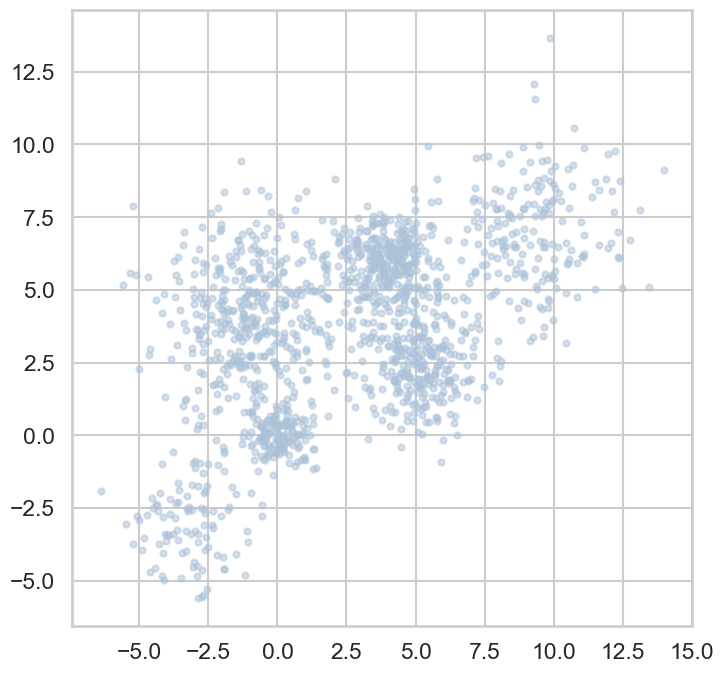

In [24]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

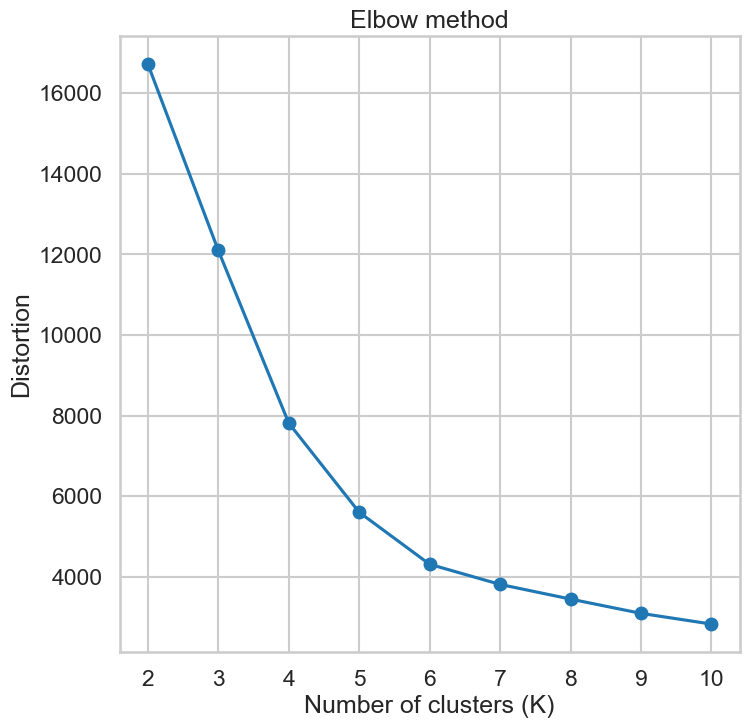

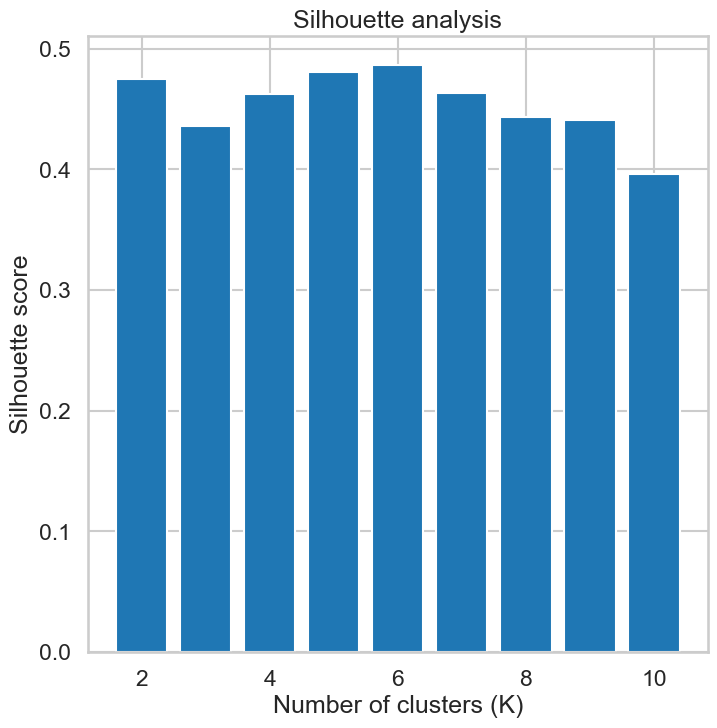

Best K based on silhouette : 6
Silhouette score for the best K: 0.48614459735646176


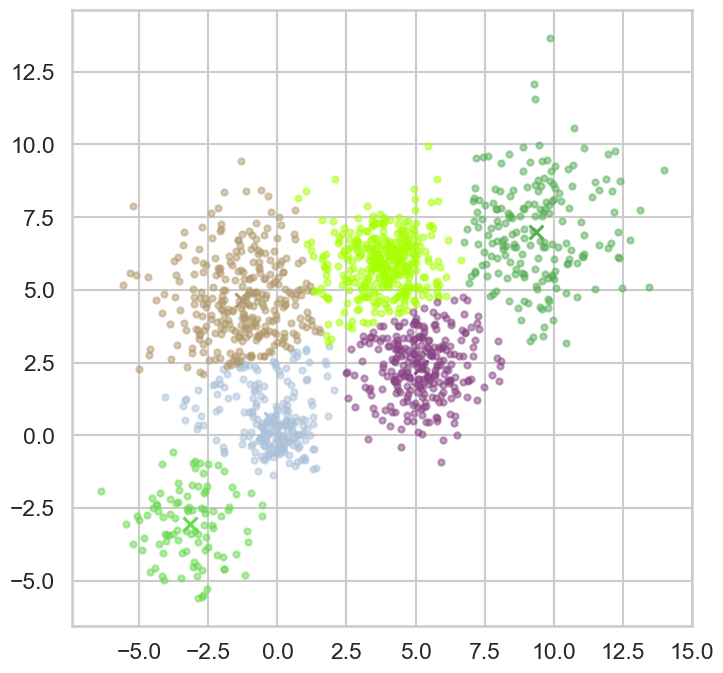

In [25]:
def KMeansClustring(X):

    # Define a range of values for K
    K_range = range(2, 11)

    # Initialize empty lists to store distortion and silhouette scores for each K
    distortion = [] # Distortion is a measure of how far each point is from its assigned cluster center
    silhouette = [] # Silhouette score is a measure of how well each point fits into its cluster compared to other clusters

    # Loop over each value of K
    for K in K_range:
        # Create a K-means model with K clusters
        km = KMeans(n_clusters=K,random_state=42)
        # Fit the model on the data
        km.fit(X)
        # Append the distortion (sum of squared distances to cluster centers) to the list
        distortion.append(km.inertia_)
        # Append the silhouette score (average of silhouette coefficients for each point) to the list
        silhouette.append(silhouette_score(X, km.labels_))

    # Plot distortion versus K using a line plot
    plt.figure()
    plt.plot(K_range, distortion, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow method')
    plt.show()

    # Plot silhouette score versus K using a bar plot
    plt.figure()
    plt.bar(K_range, silhouette)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis')
    plt.show()

    # Choose the best value of K based on the Elbow plots
    best_K = np.argmax(silhouette) + 2

    # Store the silhouette score for the best K
    best_silhouette_score = silhouette[best_K - 2]
    
    # Create a final K-means model with the best value of K
    final_km = KMeans(n_clusters=best_K, random_state=42)
    
    # Fit the model on the data and get the cluster labels for each point
    final_labels = final_km.fit_predict(X)

    # Display the outcome of clustering using a scatter plot with different colors for each cluster and cross markers for cluster centers 
    display_cluster(X, final_km, best_K)

    # Store the silhouette score for the best value of K for later comparison with other clustering techniques 
    best_silhouette = silhouette_score(X, final_labels)

    print(f'Best K based on silhouette : {best_K}')
    print(f'Silhouette score for the best K: {best_silhouette}')

KMeansClustring(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

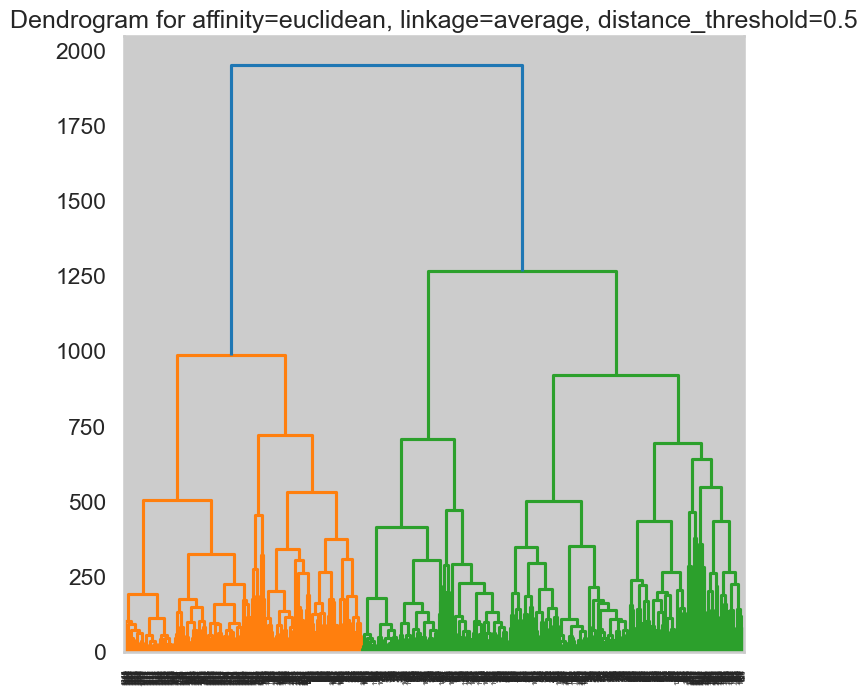

Cluster labels: [215 182 119 ... 307 188  15]
Silhouette score: 0.3743241305054595


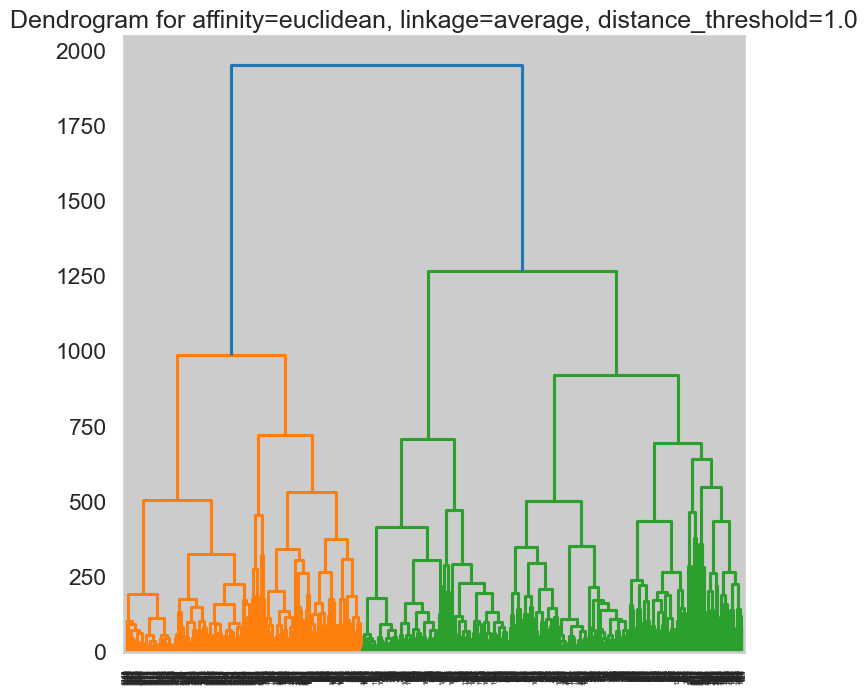

Cluster labels: [112  89 112 ...  76  93  31]
Silhouette score: 0.32384977908646284


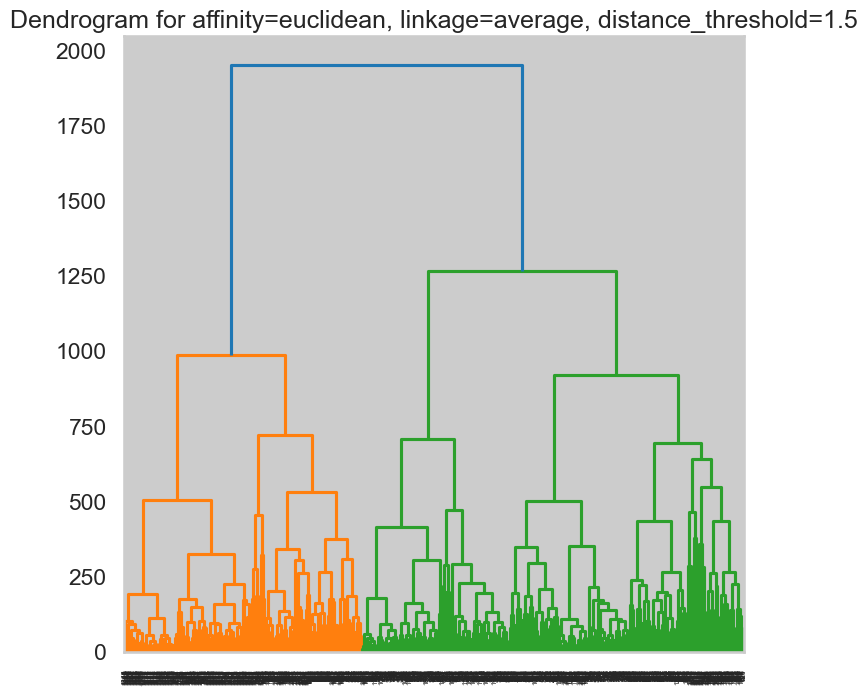

Cluster labels: [ 4 17  4 ... 37 46 18]
Silhouette score: 0.2955860015793413


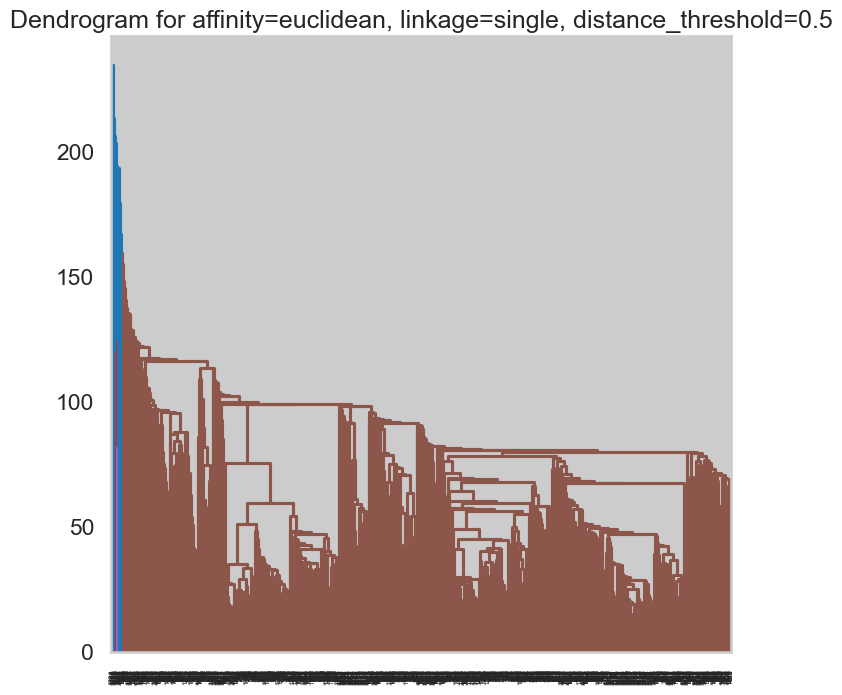

Cluster labels: [ 0  0  0 ... 58 50  8]
Silhouette score: -0.4596550259264691


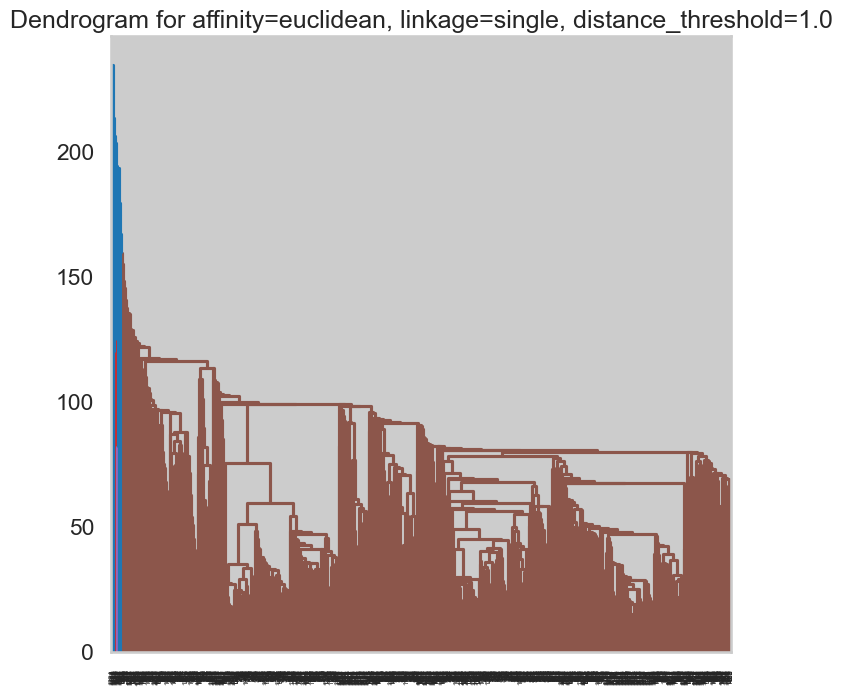

Cluster labels: [0 0 0 ... 6 2 0]
Silhouette score: -0.14944154607335855


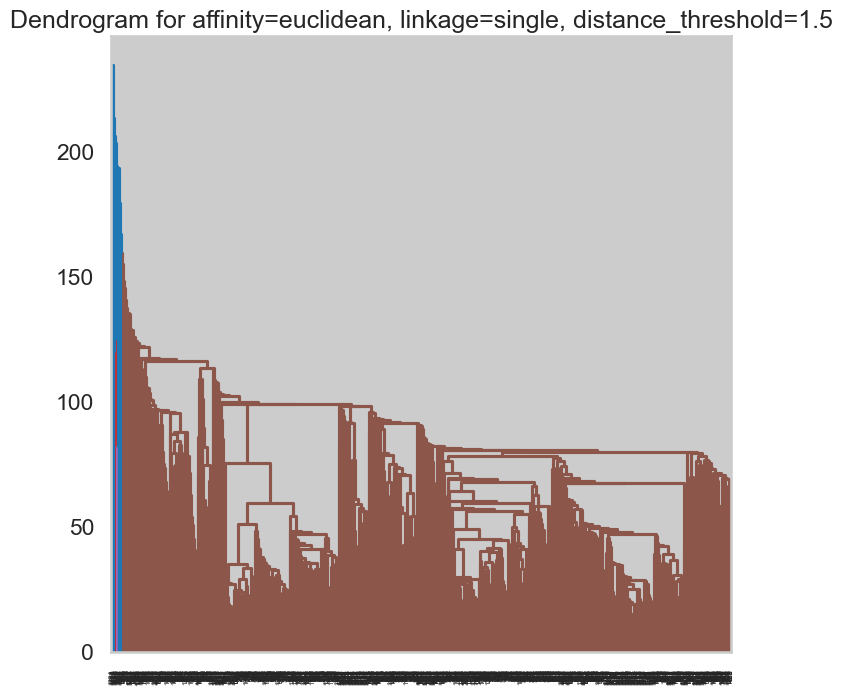

Cluster labels: [0 0 0 ... 2 0 0]
Silhouette score: 0.17400752332621522


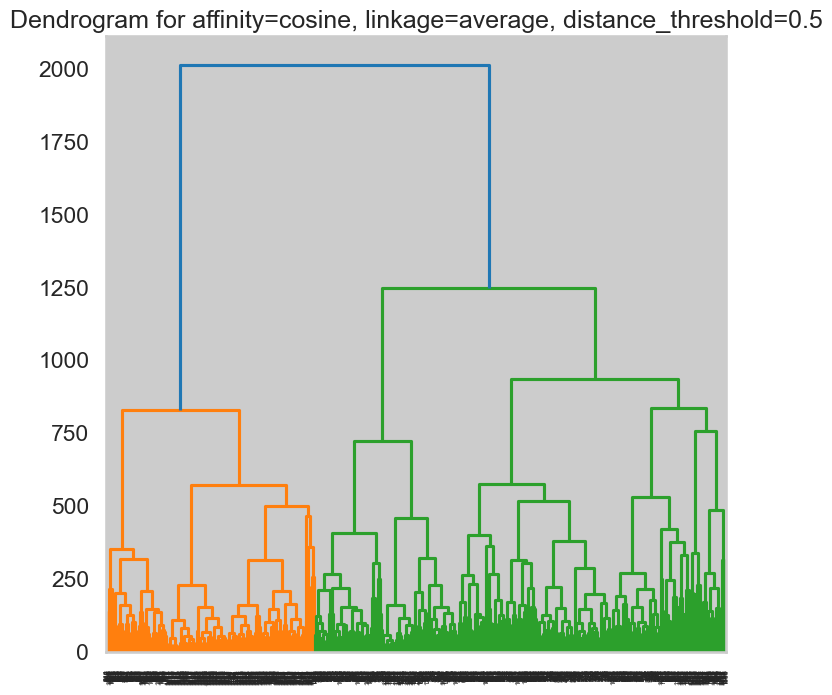

Cluster labels: [2 2 2 ... 3 3 3]
Silhouette score: 0.28022113778340446


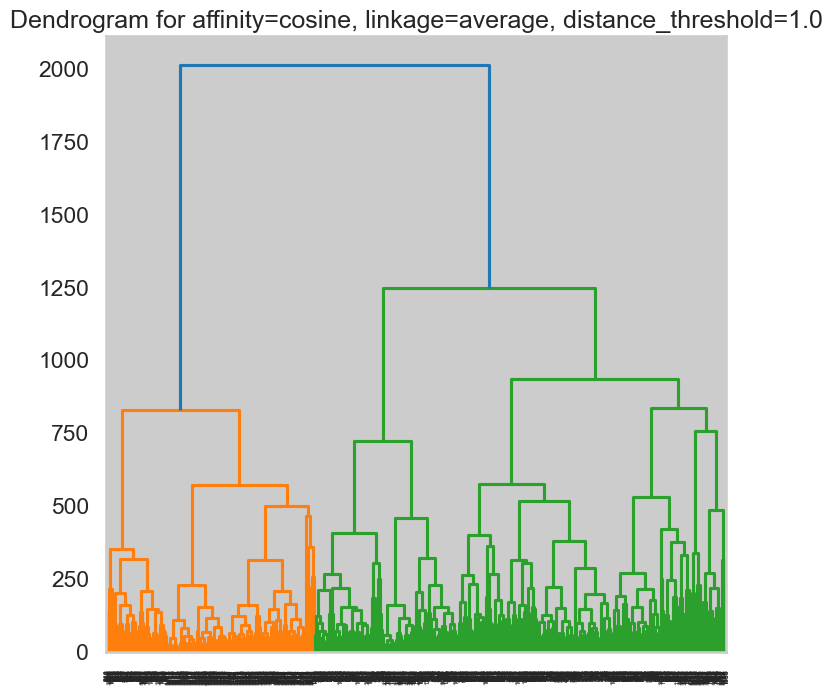

Cluster labels: [0 0 0 ... 1 1 1]
Silhouette score: 0.35251834131557364


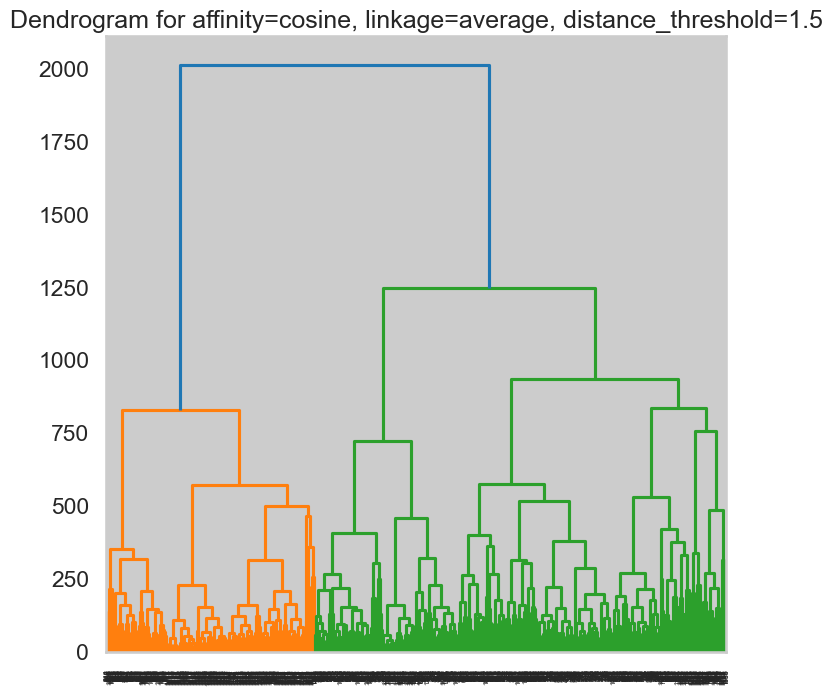

Cluster labels: [0 0 0 ... 1 1 1]
Silhouette score: 0.35251834131557364


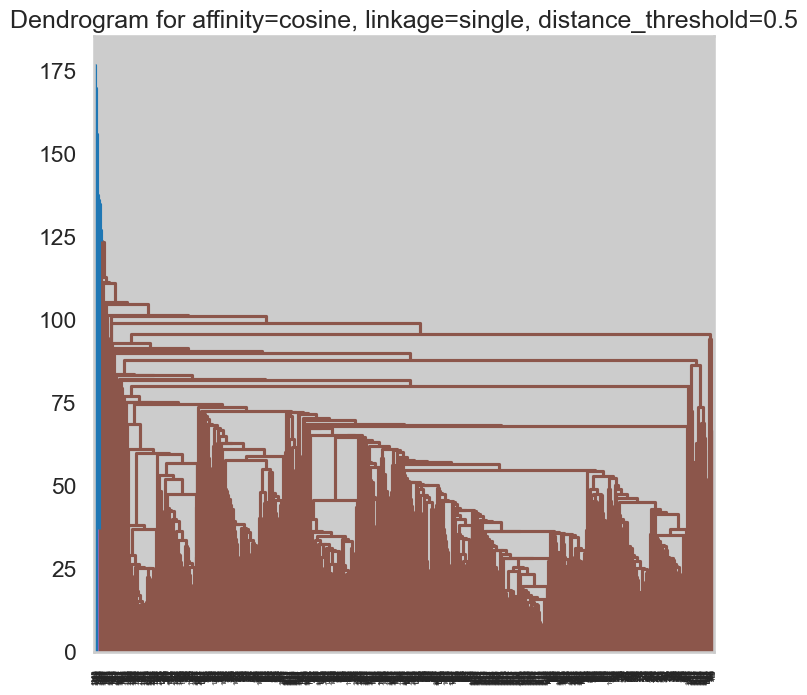

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


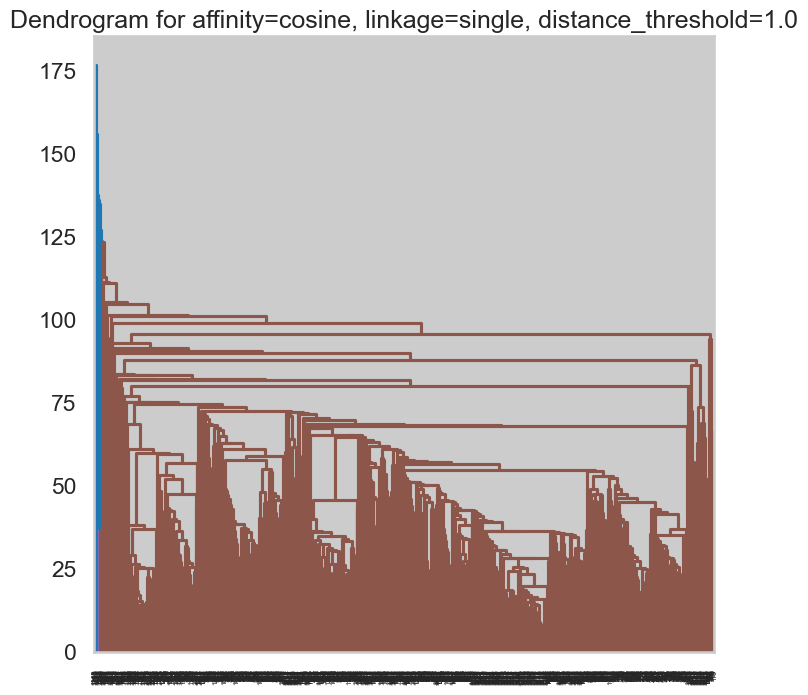

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


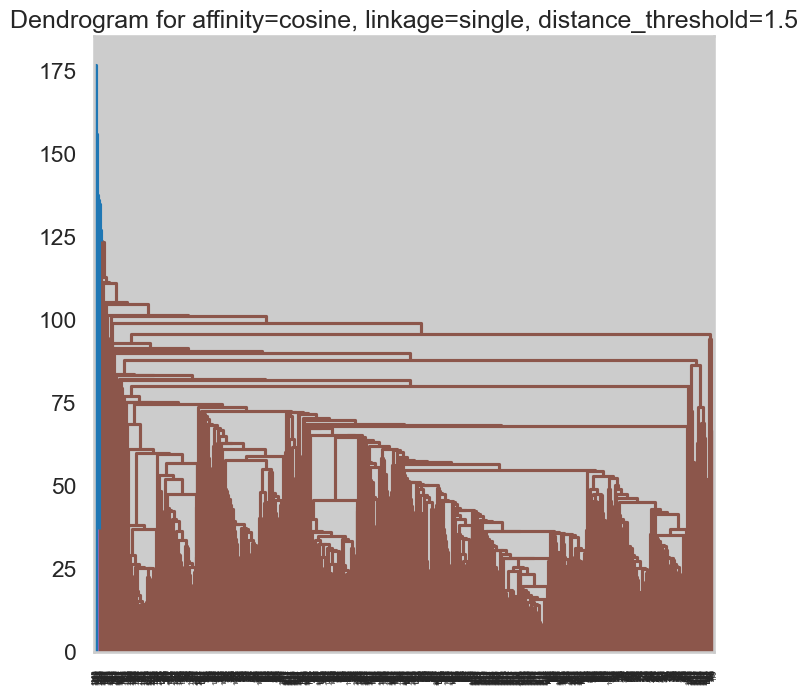

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


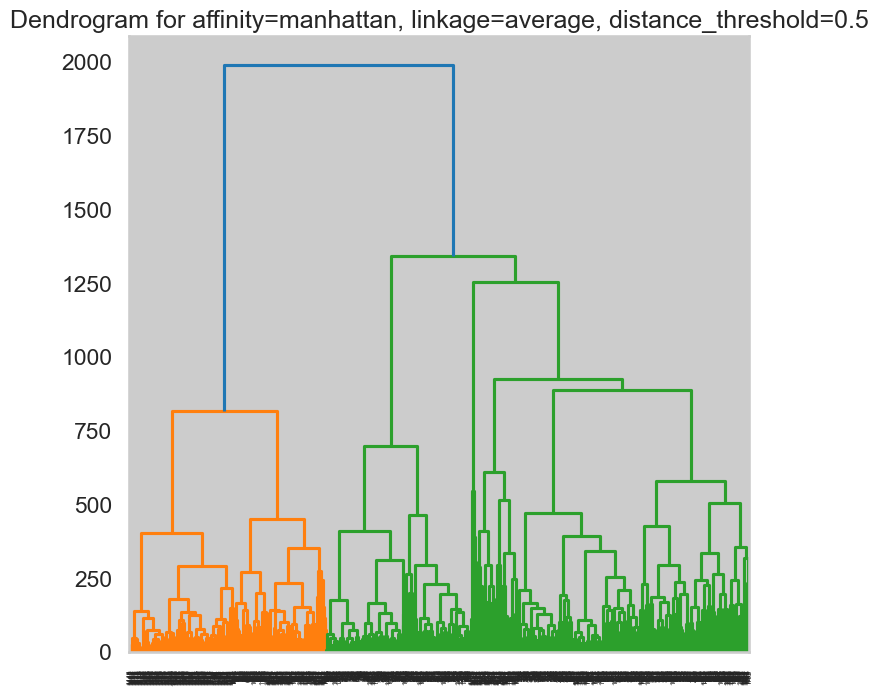

Cluster labels: [252 188 111 ... 321 392 320]
Silhouette score: 0.37556682733402785


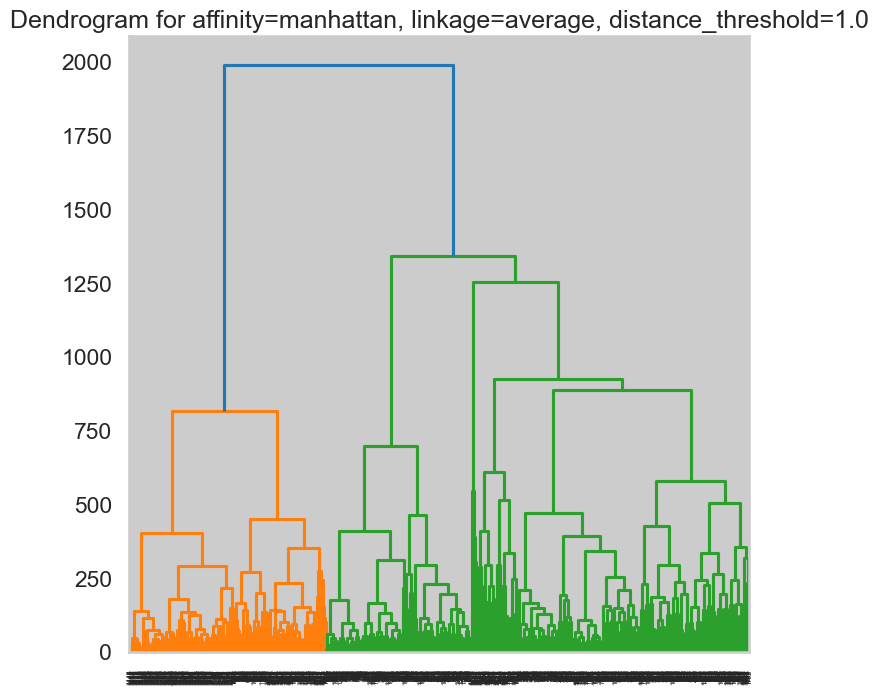

Cluster labels: [ 13  39   6 ... 160  97  24]
Silhouette score: 0.34093328073765305


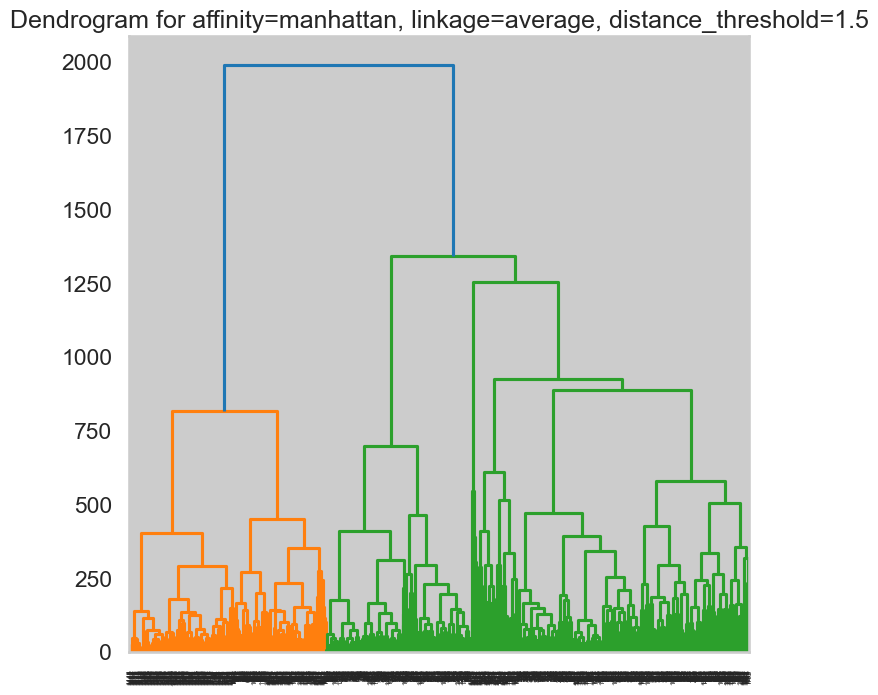

Cluster labels: [57 54 18 ... 79 48  1]
Silhouette score: 0.3114282132215952


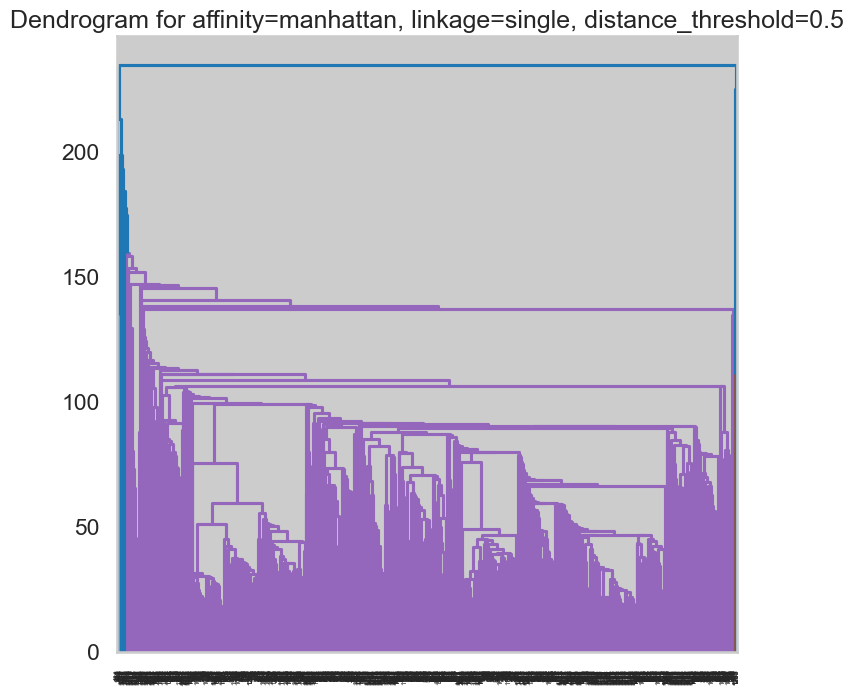

Cluster labels: [ 11  23  11 ... 103  40   1]
Silhouette score: -0.4810336379611459


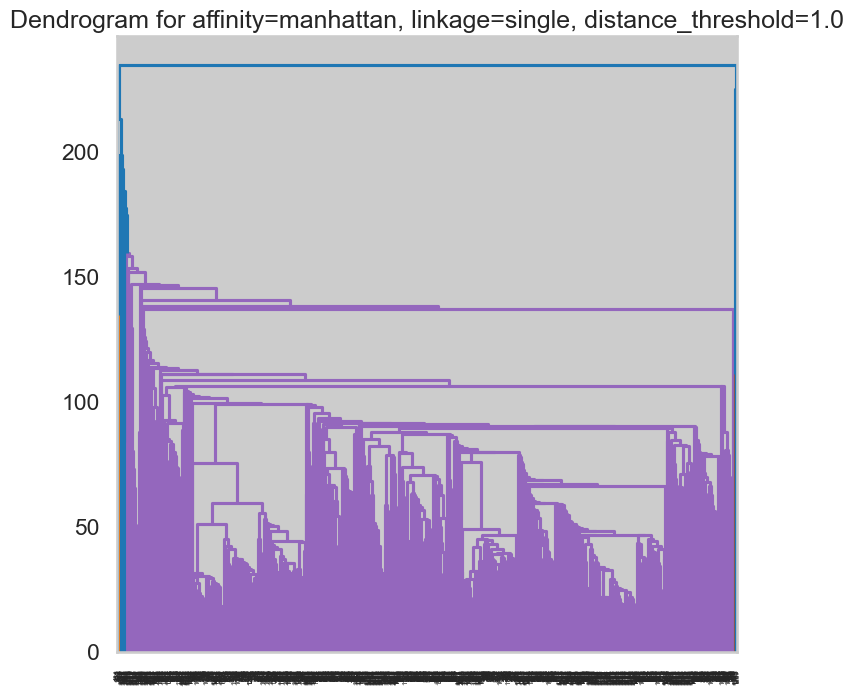

Cluster labels: [ 1  1  1 ... 12  4  1]
Silhouette score: -0.4080040507331309


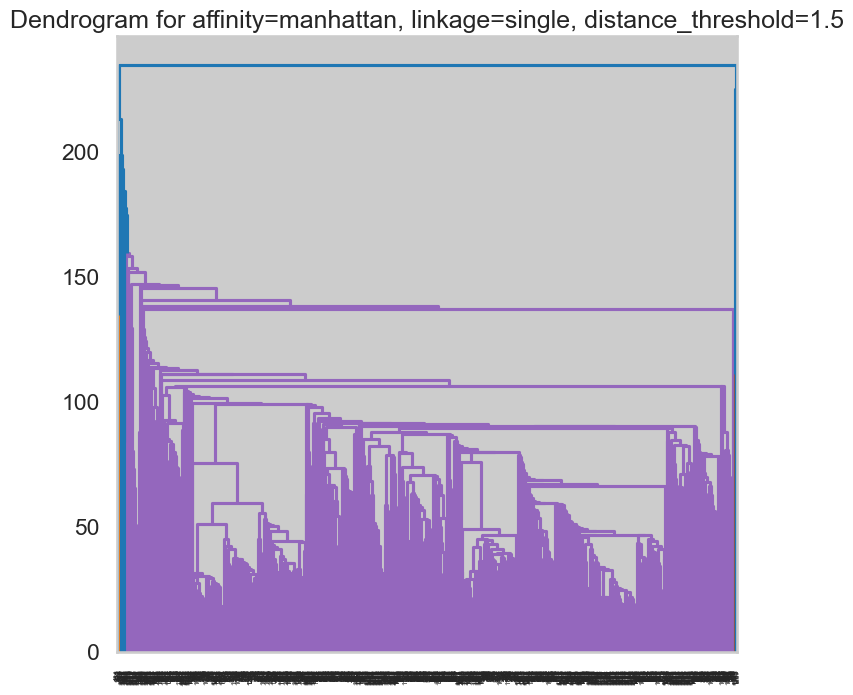

Cluster labels: [0 0 0 ... 5 0 0]
Silhouette score: 0.08705564851389591


In [26]:
def HierarchicalClustering(X):

    # Define a list of values for affinity (the metric used to compute the linkage)
    affinity_list = ['euclidean','cosine', 'manhattan' ]

    # Define a list of values for linkage (the criterion used to merge clusters)
    linkage_list = ['average', 'single']

    # Define a list of values for distance_threshold (the threshold to stop merging clusters)
    distance_threshold_list = [0.5, 1.0, 1.5]
    
    # Initialize an empty dictionary to store the silhouette scores for each combination of parameters
    silhouette_dict = {}

    # Loop over each combination of parameters
    for affinity in affinity_list:
        for linkage in linkage_list:
            for distance_threshold in distance_threshold_list:
                # Create an AgglomerativeClustering model with the given parameters
                ac = AgglomerativeClustering(affinity=affinity, linkage=linkage, distance_threshold=distance_threshold, n_clusters=None)
                # Fit the model on the data and get the cluster labels for each point
                ac_labels = ac.fit_predict(X)
                # Convert the children attribute to a linkage matrix using the linkage function 
                ac_linkage = hclinkage(ac.children_, method=linkage) 
                # Plot the dendrogram using a helper function from scipy.cluster.hierarchy module
                plt.figure()
                plt.title(f'Dendrogram for affinity={affinity}, linkage={linkage}, distance_threshold={distance_threshold}')
                dendrogram(ac_linkage)
                plt.show()
                
                # Display cluster labels on console 
                print(f'Cluster labels: {ac_labels}')
                
                # Check if number of labels is at least 2 
                if len(np.unique(ac_labels)) >= 2: 
                    # Calculate the silhouette score using the silhouette_score function from sklearn.metrics module
                    ac_silhouette = silhouette_score(X, ac_labels)  
                    # Display silhouette score on console 
                    print(f'Silhouette score: {ac_silhouette}')  
                    # Store silhouette score in dictionary with parameter combination as key 
                    silhouette_dict[(affinity,linkage,distance_threshold)] = ac_silhouette
                
                else: 
                    print('Silhouette score cannot be calculated for one label')

HierarchicalClustering(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

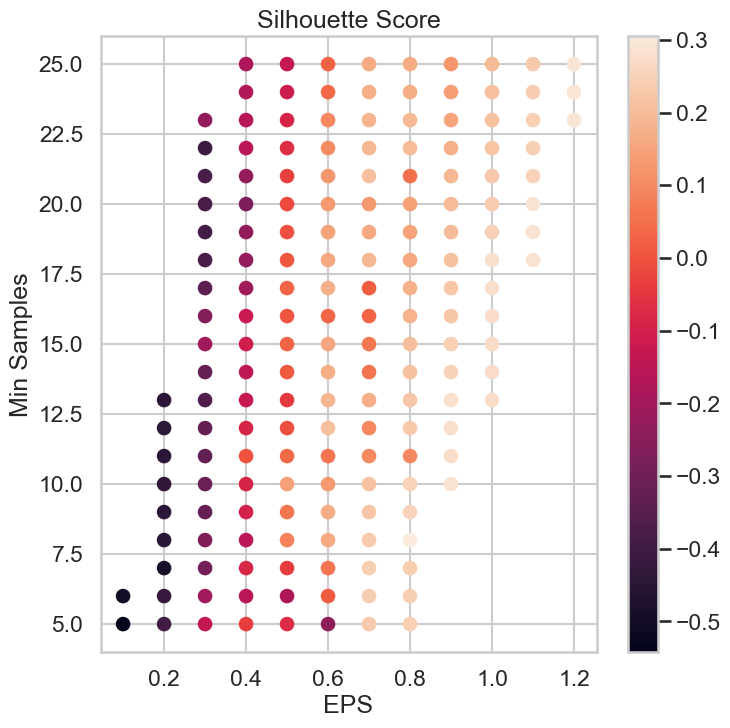

Best Silhouette Score: 0.3051951203876005
Best EPS: 0.8
Best Min Samples: 8


In [27]:
def DBScan(data):
    
    best_score = -1
    best_eps = 0.1
    best_min_samples = 5

    silhouette_scores = []
    eps_values = []
    min_samples_values = []

    for eps in range(1, 31):
        for min_samples in range(5, 26):
            db = DBSCAN(eps=eps/10.0, min_samples=min_samples)
            labels = db.fit_predict(data)

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters_ > 1:
                score = silhouette_score(data, labels)
                silhouette_scores.append(score)
                eps_values.append(eps/10.0)
                min_samples_values.append(min_samples)

                if score > best_score:
                    best_score = score
                    best_eps = eps/10.0
                    best_min_samples = min_samples

    plt.scatter(eps_values, min_samples_values, c=silhouette_scores)
    plt.colorbar()
    plt.xlabel('EPS')
    plt.ylabel('Min Samples')
    plt.title('Silhouette Score')
    plt.show()

    print(f'Best Silhouette Score: {best_score}')
    print(f'Best EPS: {best_eps}')
    print(f'Best Min Samples: {best_min_samples}')

DBScan(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

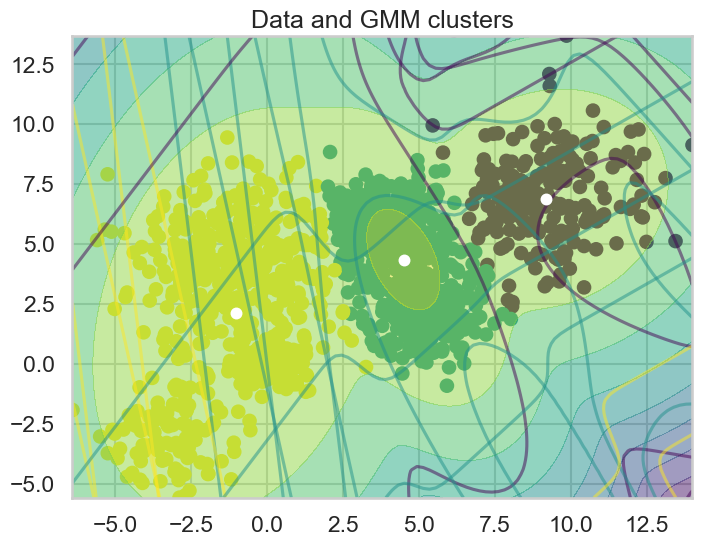

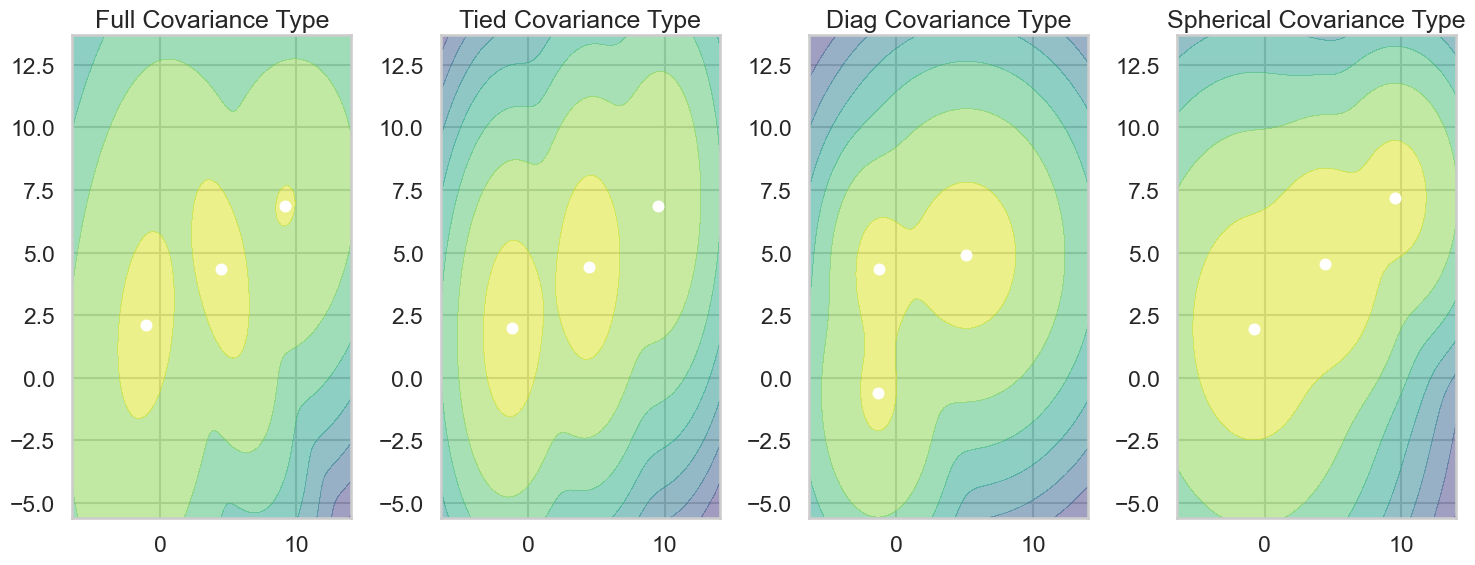

In [28]:
def plot_gmm(X, gmm, title):
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis')
    plt.title(title)

    # Define a grid of points to evaluate the GMM probability density function (PDF)
    x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    Xgrid, Ygrid = np.meshgrid(x, y)
    XY = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

    # Plot the contours of the GMM PDF for each component and the total mixture
    Z = gmm.score_samples(XY).reshape(Xgrid.shape) # Total mixture PDF
    for i in range(gmm.n_components):
        Z_comp = gmm.score_samples(XY).reshape(Xgrid.shape) - gmm.score_samples(XY - gmm.means_[i]).reshape(Xgrid.shape) # Component i PDF
        plt.contour(x, y, Z_comp, cmap=plt.cm.get_cmap('viridis', gmm.n_components), alpha=0.5)
    plt.contourf(x, y, Z, cmap='viridis', alpha=0.5)
    plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='w', s=50, zorder=10)

    plt.figure(figsize=(15, 6))
    # Change the covariance_type and check the difference in the resulting probability fit
    gmm_types = ['full', 'tied', 'diag', 'spherical']
    for i, cov_type in enumerate(gmm_types):
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type)
        gmm.fit(X)
        Z_cov = gmm.score_samples(XY).reshape(Xgrid.shape) # Total mixture PDF for current covariance type
        plt.subplot(1, 4, i+1)
        plt.contourf(x, y, Z_cov, cmap='viridis', alpha=0.5)
        plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='w', s=50, zorder=10)
        plt.title(cov_type.capitalize() + ' Covariance Type')

    plt.tight_layout()
    plt.show()

X = Multi_blob_Data
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
plot_gmm(X, gmm, 'Data and GMM clusters')


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [29]:
from sklearn.datasets import load_iris
iris_data = load_iris()["data"]


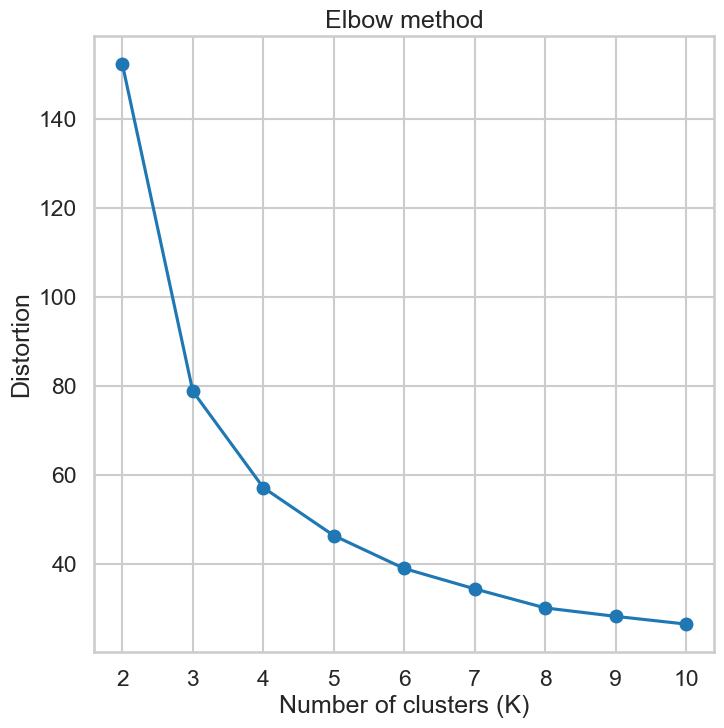

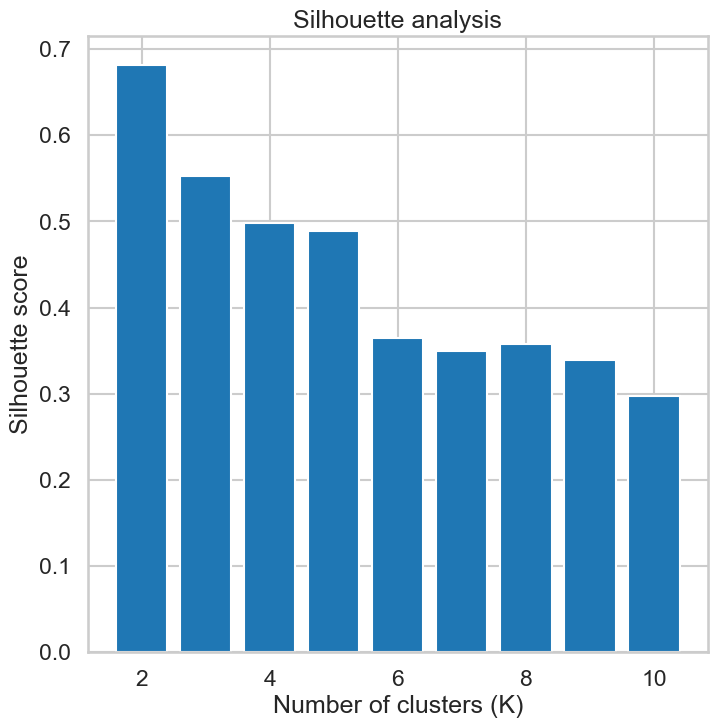

Best K based on silhouette : 2
Silhouette score for the best K: 0.6810461692117462


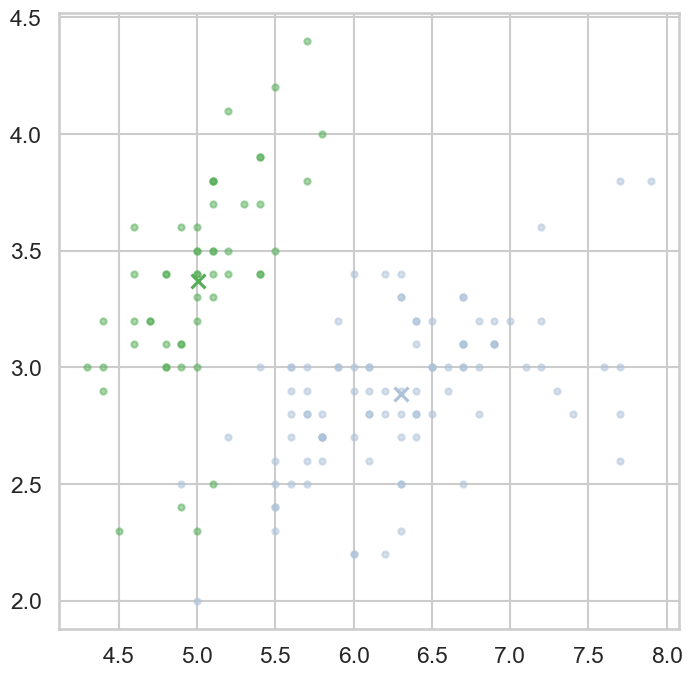

In [30]:
KMeansClustring(iris_data)

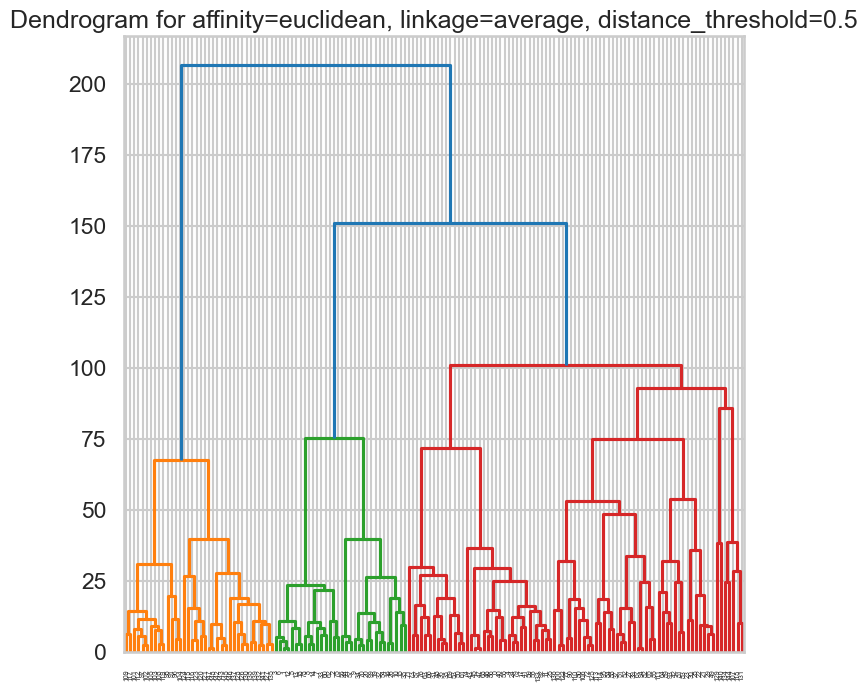

Cluster labels: [ 7  9  9  9  7  3  9  7 15  9  3  9  9 15 31 38  3  7  3  3  7  3 37  7
  9  9  7  7  7  9  9  7 29 29  9  7  7  7 15  7  7 23 15  7  3  9  3  9
  3  7  1 13  1  8  1 11 13 10  1 35 36 34 32 18  6  1 11 34 22  8 30 12
 16 18 12  1  1  1 18  6  8  8 34 16 11 13  1 22 34  8 11 18 34 10 34 34
 34 12 10 34 27 26  0  5  5  2 39  0 33 28  4  5  4 26 19 25  5 14  2 24
 21 26  2 16 21  0 16 30  5  0  0 14  5 16 17 20 25  5 30  4 21  4 26 21
 21  4 16  4 25 30]
Silhouette score: 0.2713733348257762


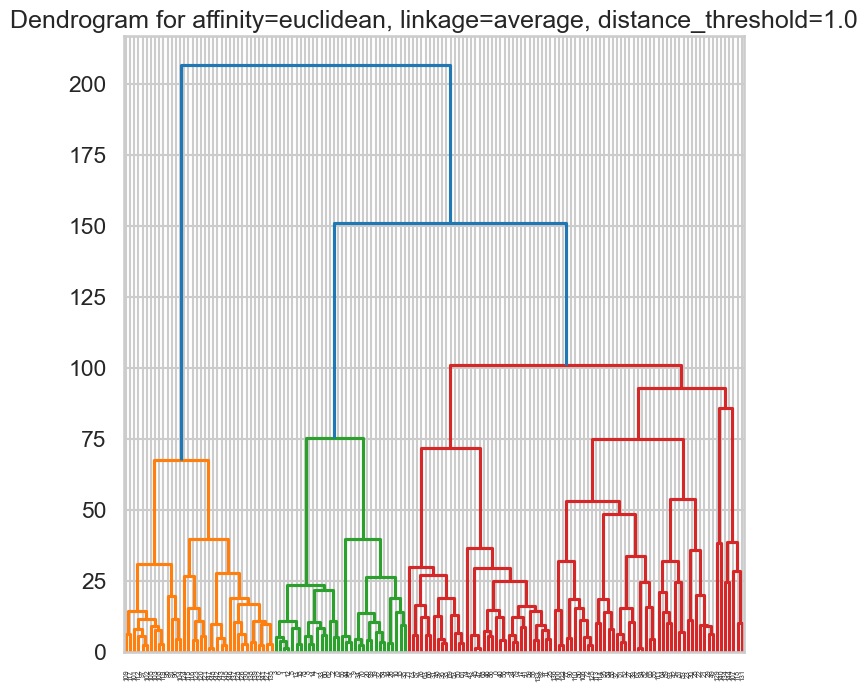

Cluster labels: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 4 4 4
 4 4 4 4 5 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 7 2 3 7 3 3 2 3 2 3 3 2 3 2 2 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 7 3 3 3 2 7 3 0 2 6 0 0 6 9 6 0 1 0
 0 0 2 2 0 0 1 6 2 0 2 6 2 0 6 2 2 0 6 6 1 0 2 0 6 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Silhouette score: 0.30828513418773884


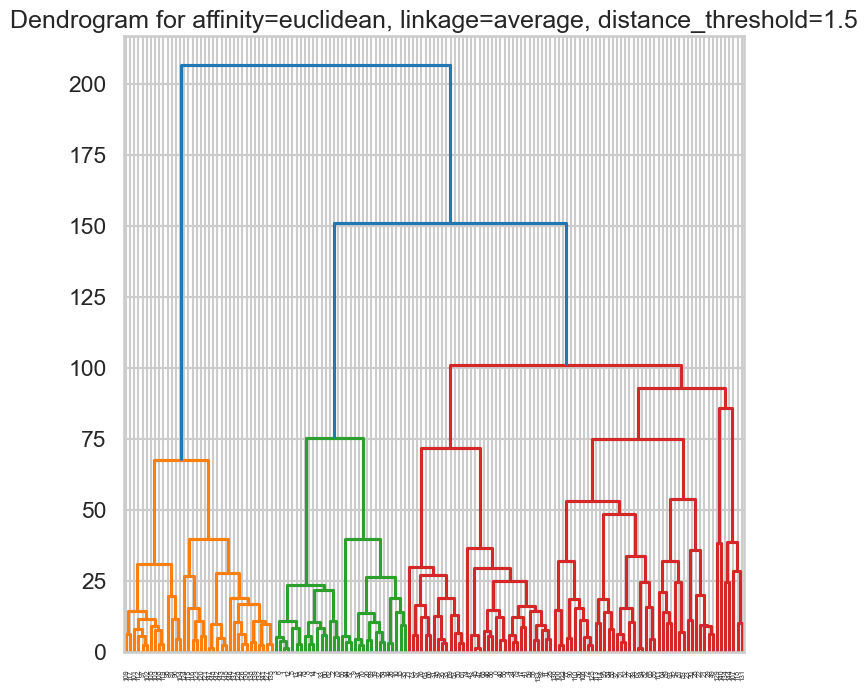

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Silhouette score: 0.47199360849942534


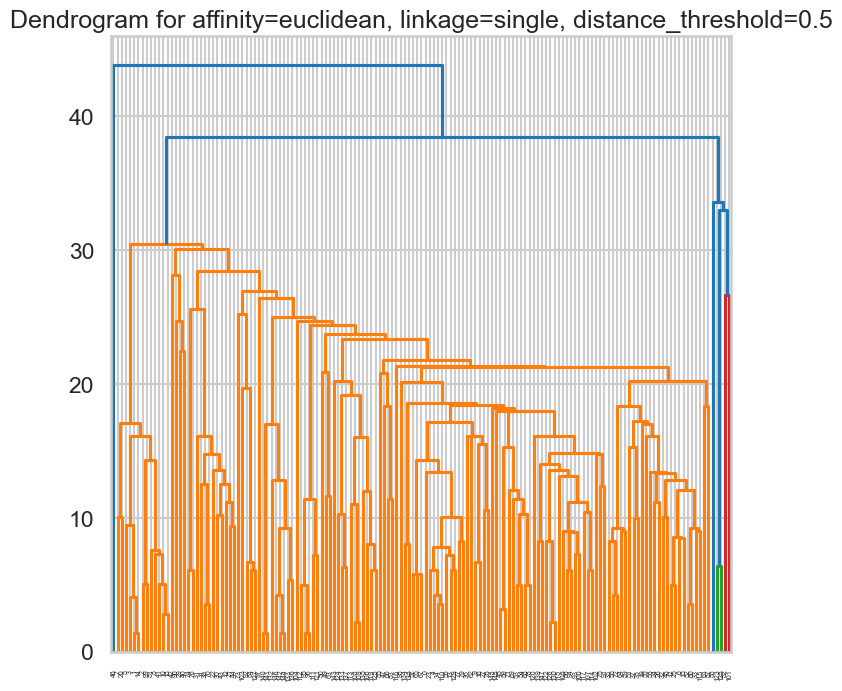

Cluster labels: [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  6  2  2  2  2  2  2
  2  2  0  0  0  0  0  0  0  4  0  0  4  0  0  0  0  0  0  0 11  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  4  0  0
  0  0  4  0  0  0  0  0  0  1  7  0  8  9  0  0  0  0  0  0  0  5  1  0
  0  0  1  0  0  0  0  0  0  0  0  5  0  0  3 10  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Silhouette score: 0.02147625040066721


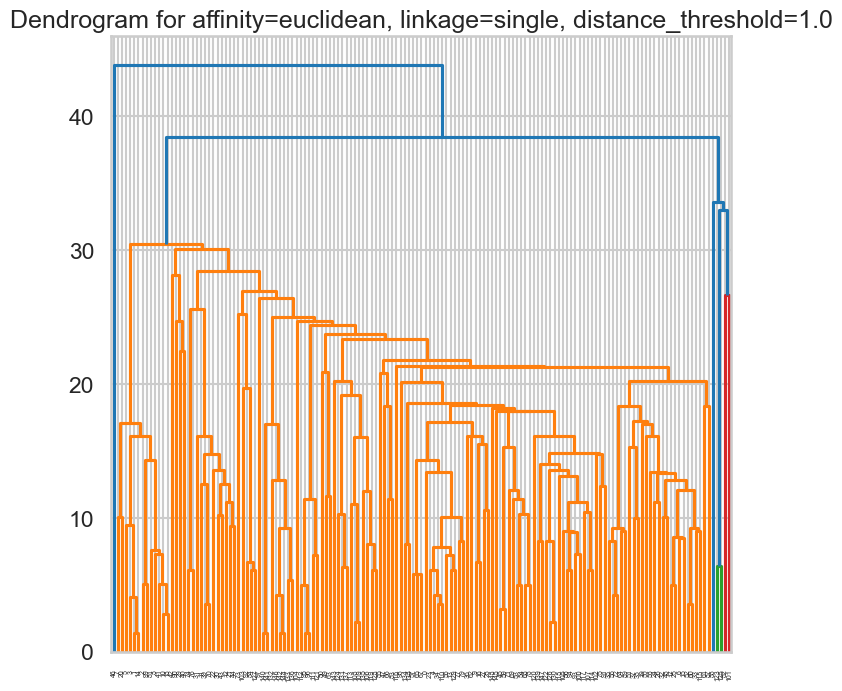

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score: 0.6867350732769777


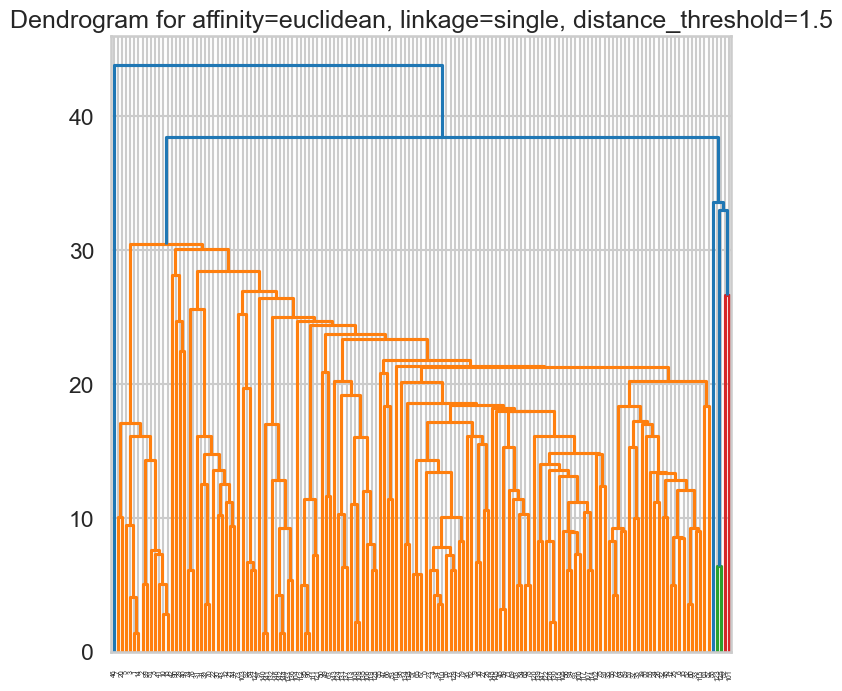

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score: 0.6867350732769777


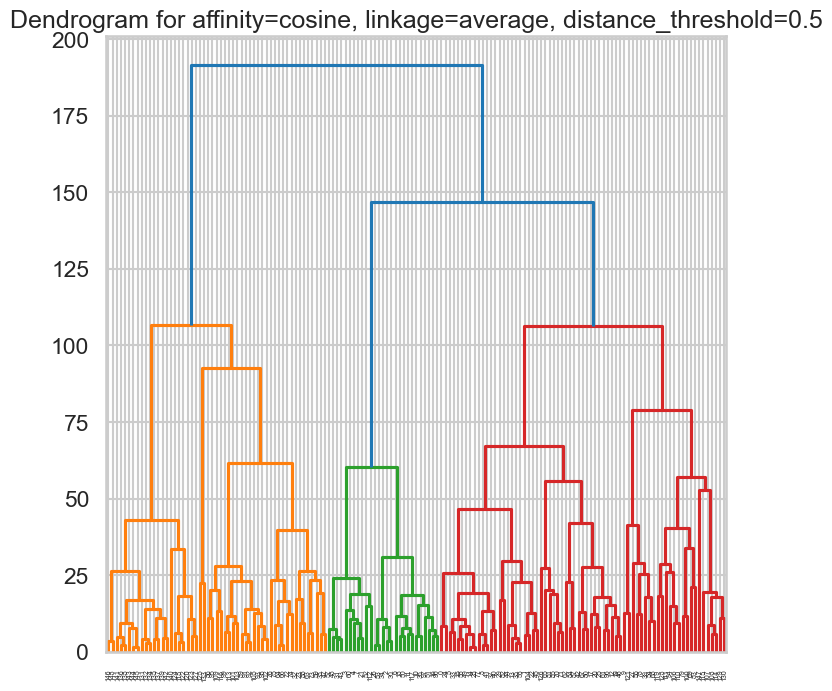

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


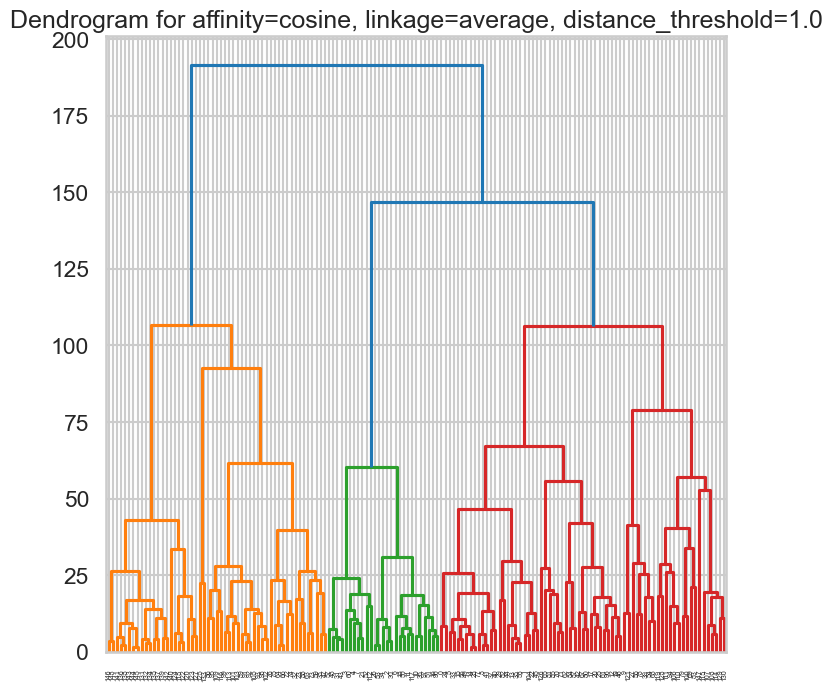

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


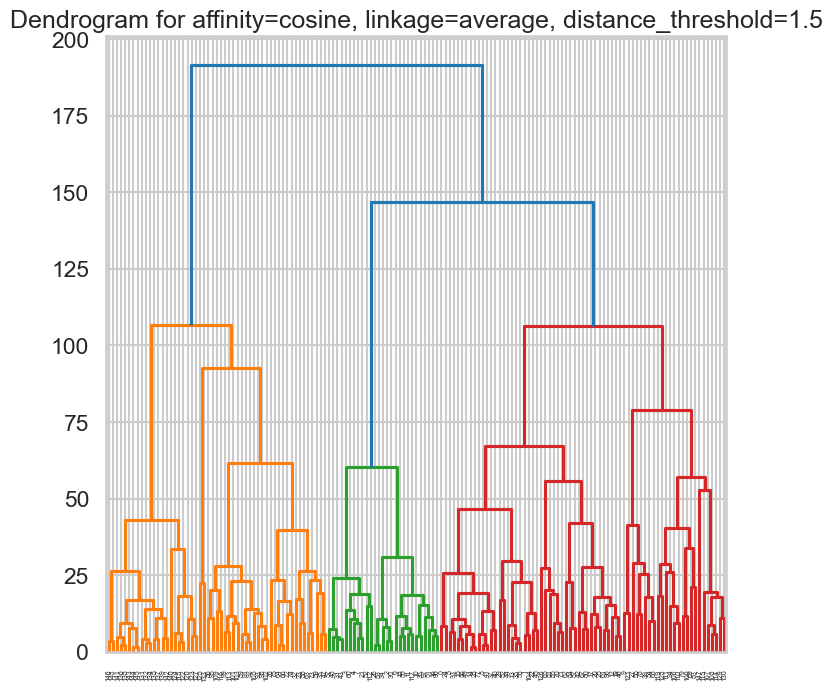

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


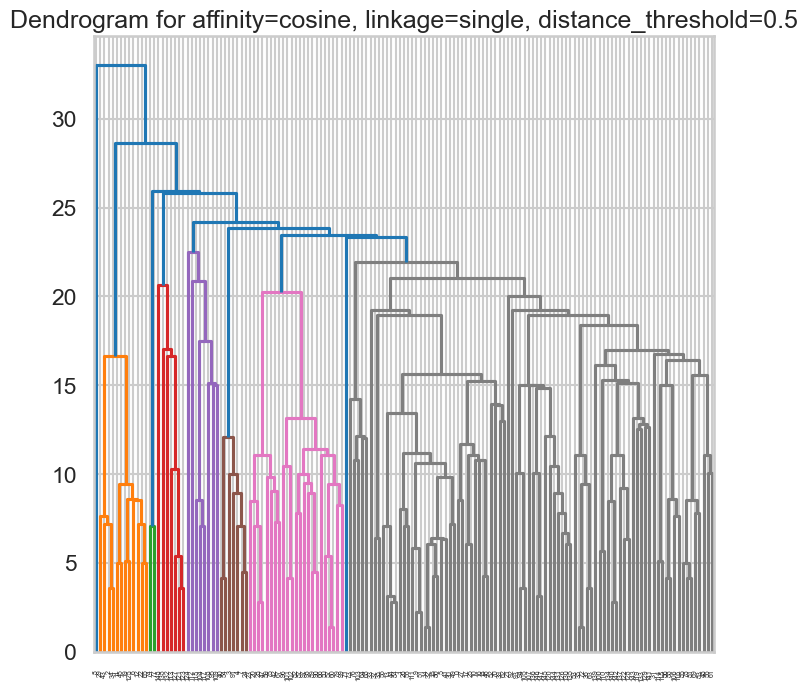

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


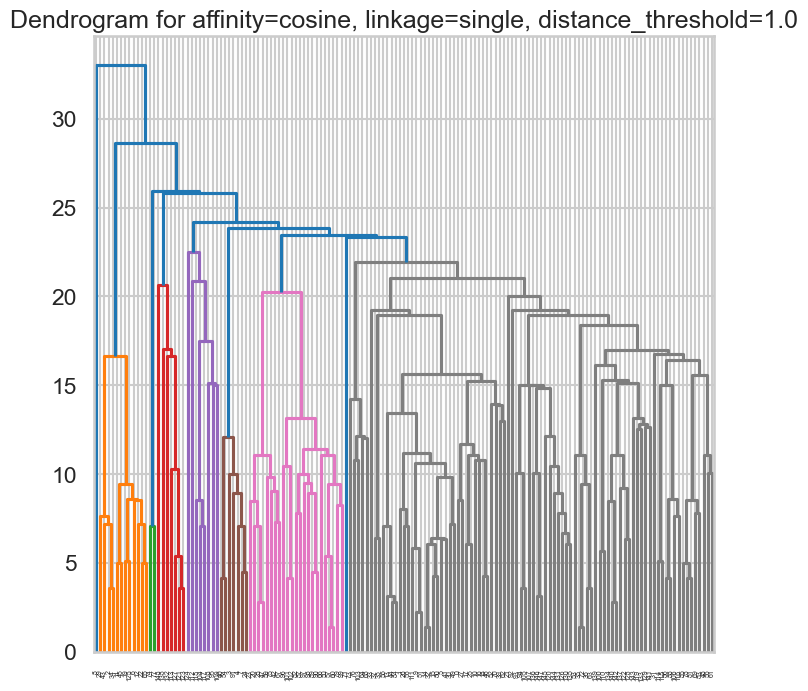

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


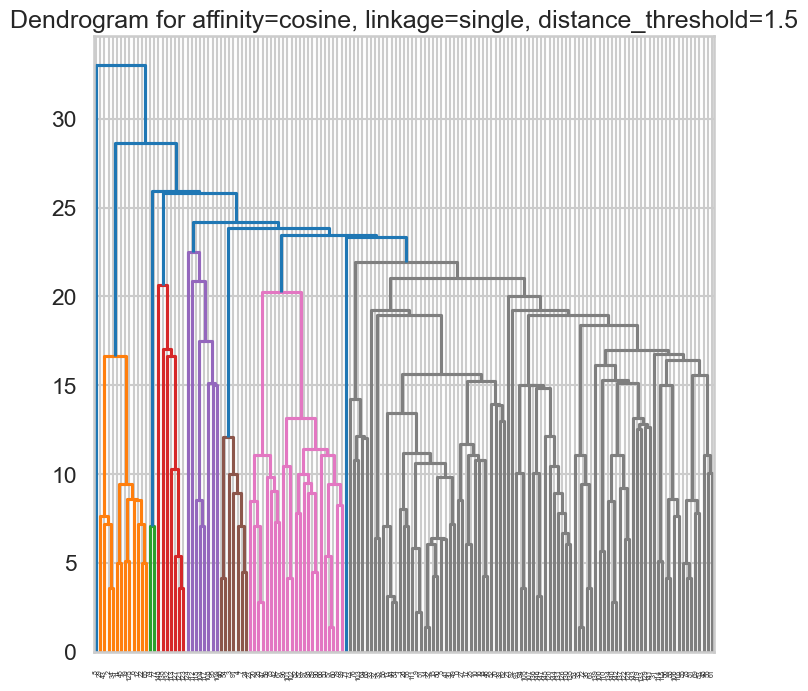

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score cannot be calculated for one label


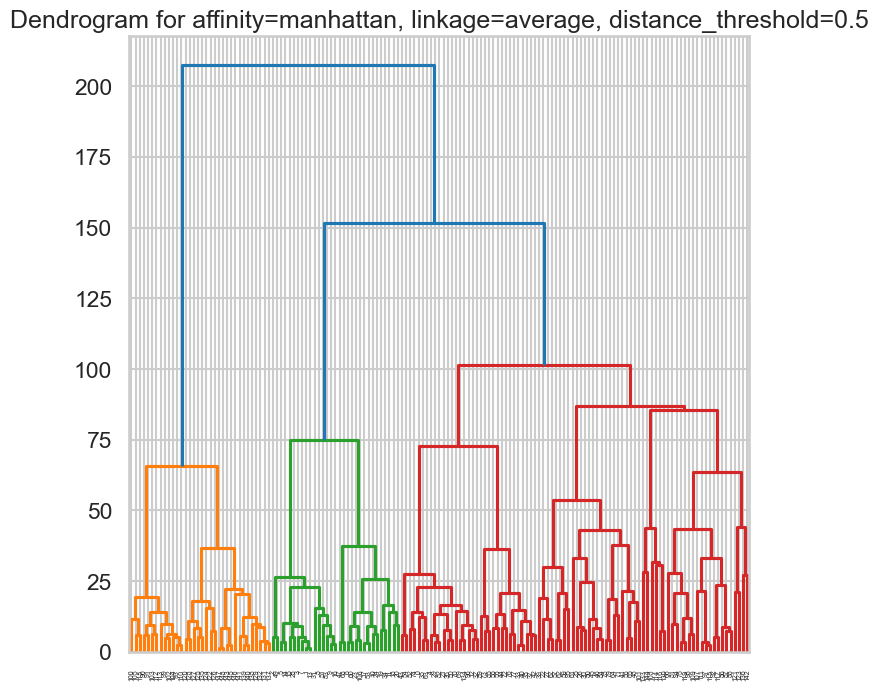

Cluster labels: [27 15  6  6 27 12  6 27 59 15 13  1 15 82 71 67 12 27 54 13  9 13 79  4
  1 15  4 27 27  1  1  9 66 50 15 70 72 27 59 27 27 47  6  4 83 15 13  6
 13 27 85 81  5 36 11 78 46 45 11 65 69 57 34 21 43 17 58 24  3 19  7 32
  2 84 22 17 63 48 21 51 19 19 24 62 58 61  5  3 23 36 42 21 24 45 23 23
 23 22 77 23 68  0 52 29 75 80 64 39 31 55 49 56 60  0 25 33 29 53 40 30
 18 74 44 28 10 16 28  7 37 73 76 35 37  2 41 26  8 29  7 60 20 14  0 18
 10 14 38 49  8  7]
Silhouette score: 0.20738746447099515


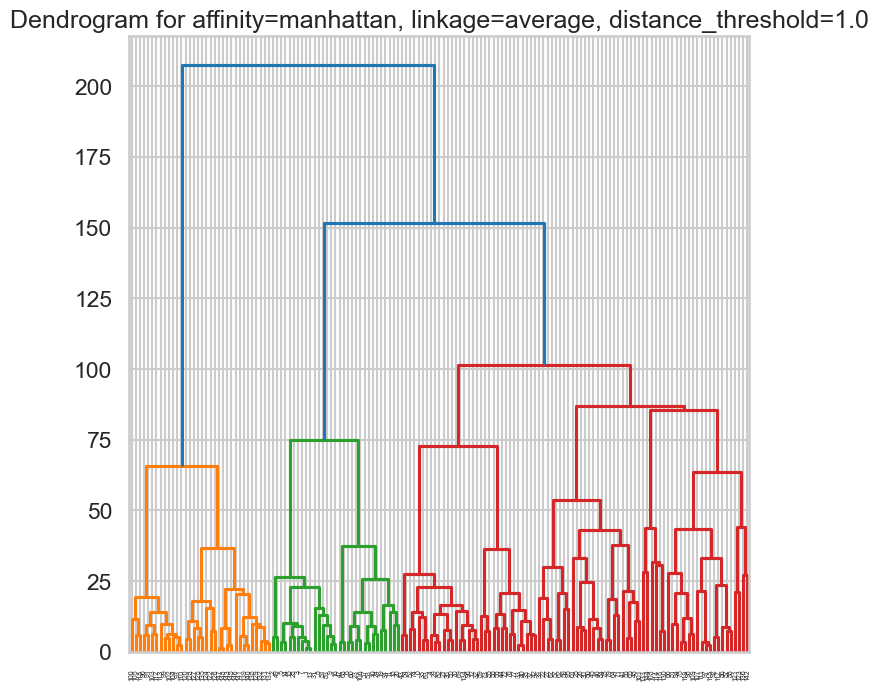

Cluster labels: [11 10 10 10 11  6 10 11 10 10 11 10 10 10  5  5  6 11  6 11 11 11 19 11
 10 10 11 11 11 10 10 11  5  5 10 11 11 11 10 11 11 23 10 11  6 10 11 10
 11 11 22 25 22  1 22  0 25 17 22  1 17  0 16 12  1 22  0  0  2  1  3 12
  3 12 12 22 22 13 12  1  1  1  0  3  0 25 22  2  0  1  0 12  0 17  0  0
  0 12 17  0  8 24  4  9  9 18 15  4  7 27 13  9 21 24 24  8  9 14 18  2
 21 24 18  3 21  4  3  3  9  4  4 14  9  3 20 26  8  9  3 21 21 21 24 21
 21 21  3 13  8  3]
Silhouette score: 0.26306030563698024


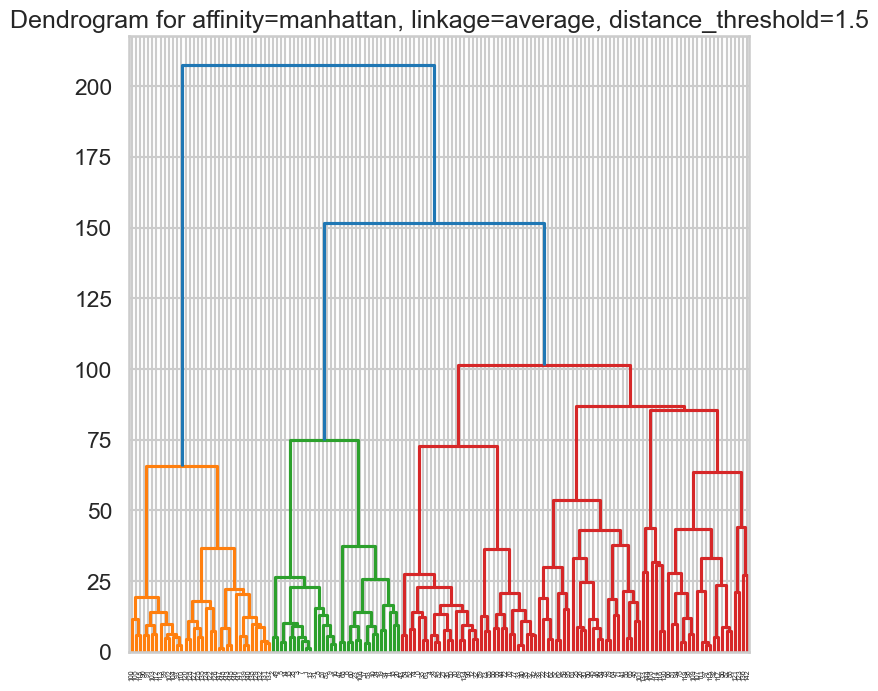

Cluster labels: [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2 12 12  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2 12 12  2  2  2  2  2  2  2 11  2  2  2  2  2  2
  2  2  3  3  3  9  3  9  3  8  3  9  8  9  1  3  9  3  9  9  1  9  5  3
  5  3  3  3  3  4  3  9  9  9  9  5  9  3  3  1  9  9  9  3  9  8  9  9
  9  3  8  9  4  5 10  4  4  6  7 10  0 13  4  4  4  5  5  4  4 14  6  1
  4  5  6  5  4 10  5  5  4 10 10 14  4  5  0  6  4  4  5  4  4  4  5  4
  4  4  5  4  4  5]
Silhouette score: 0.2995040594541018


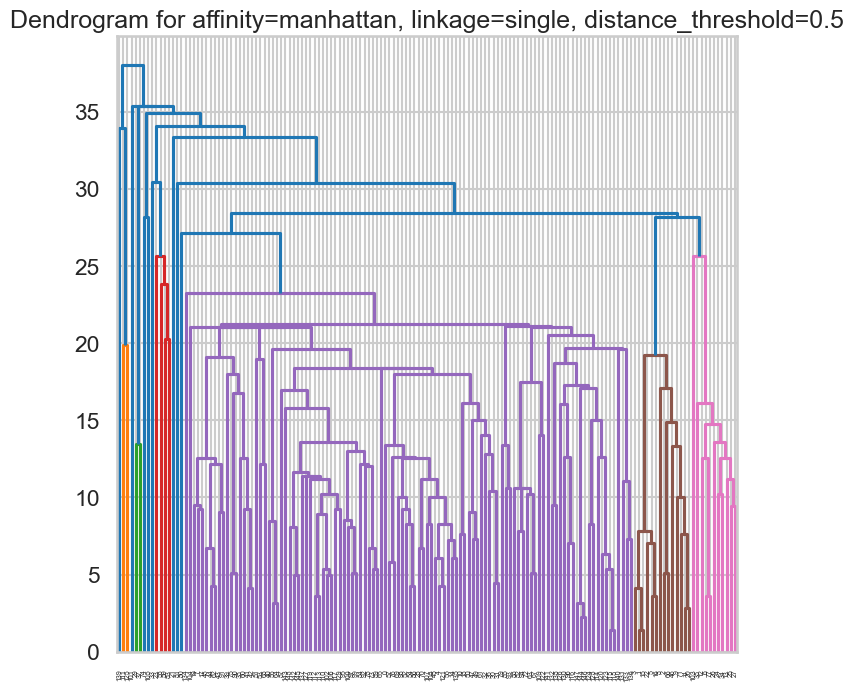

Cluster labels: [ 5  5  5  5  5  0  5  5  5  5  5  5  5  5 43 39  0  5  0  5 50  5 33  5
  5  5  5  5  5  5  5 50 36 41  5  5  5  5  5  5  5 35  5  5  5  5  5  5
  5  5 54 46  6 13  6 24 45 28  6 37 17  4 47  4 57  6 23 24 25 13 12 24
 12  4  6  6 34 30  4 40 13 13 24 12 23 29  6 25 24 13 56  4 24 28 24 24
 24  6 49 24 22 11 44  2 38 42 51 20 55 31  2 18  9 11 32 21  2 14  8 48
  1 53 16 12  1 27 12 12 52 26 15 58 52 12  7 19 10  2 12  9  1  3 11  1
  1  3 12  2 10 12]
Silhouette score: 0.08485294874087593


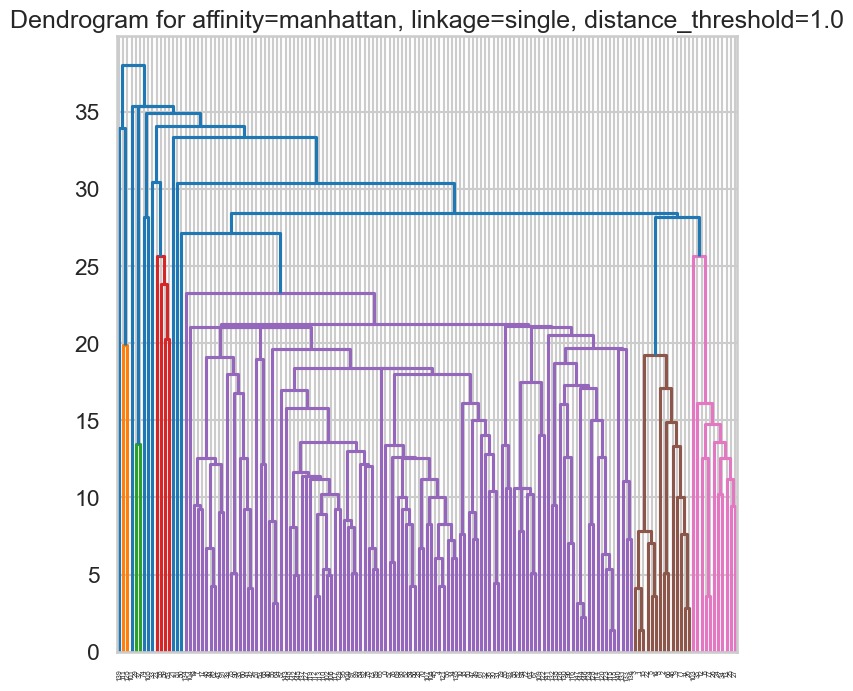

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 5 0 6 3 0
 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score: 0.14738244260973818


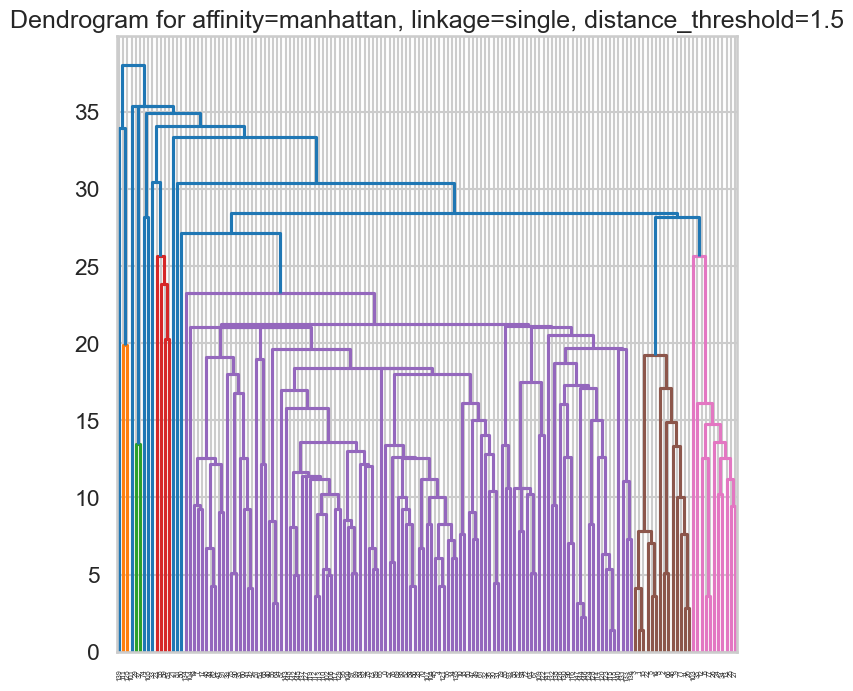

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette score: 0.6867350732769777


In [31]:
HierarchicalClustering(iris_data)

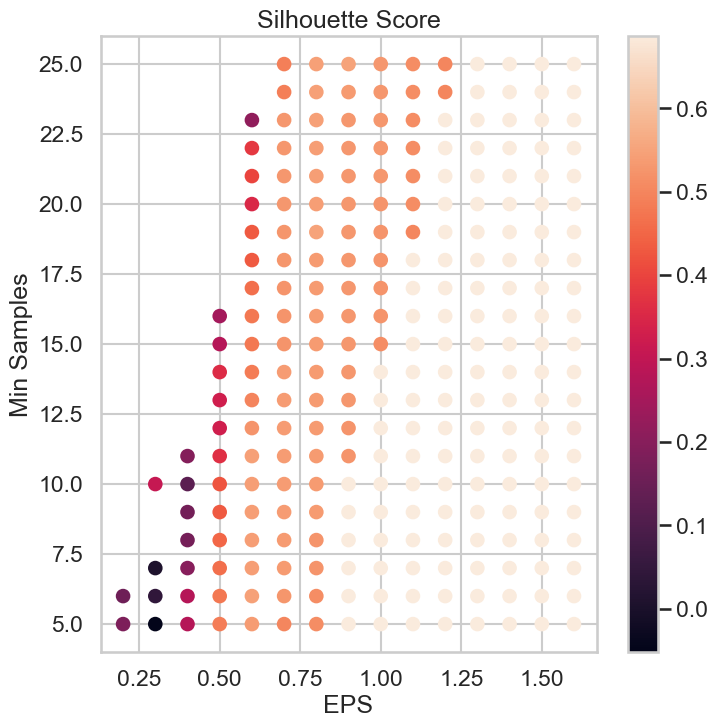

Best Silhouette Score: 0.6867350732769777
Best EPS: 0.9
Best Min Samples: 5


In [32]:
DBScan(iris_data)

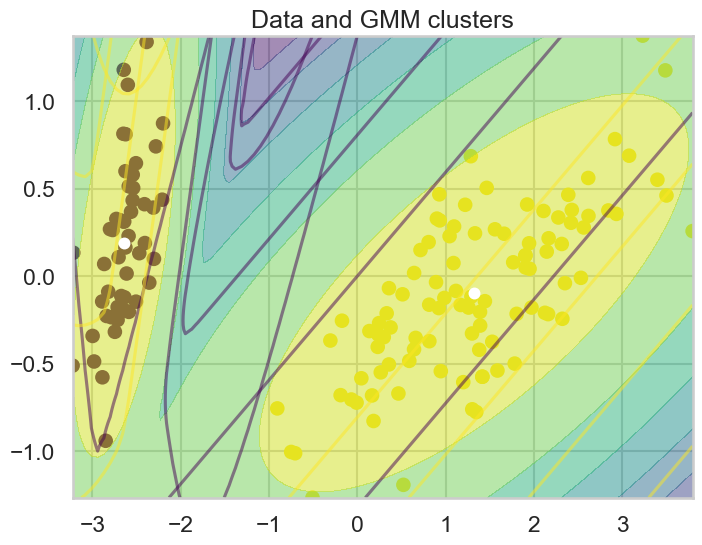

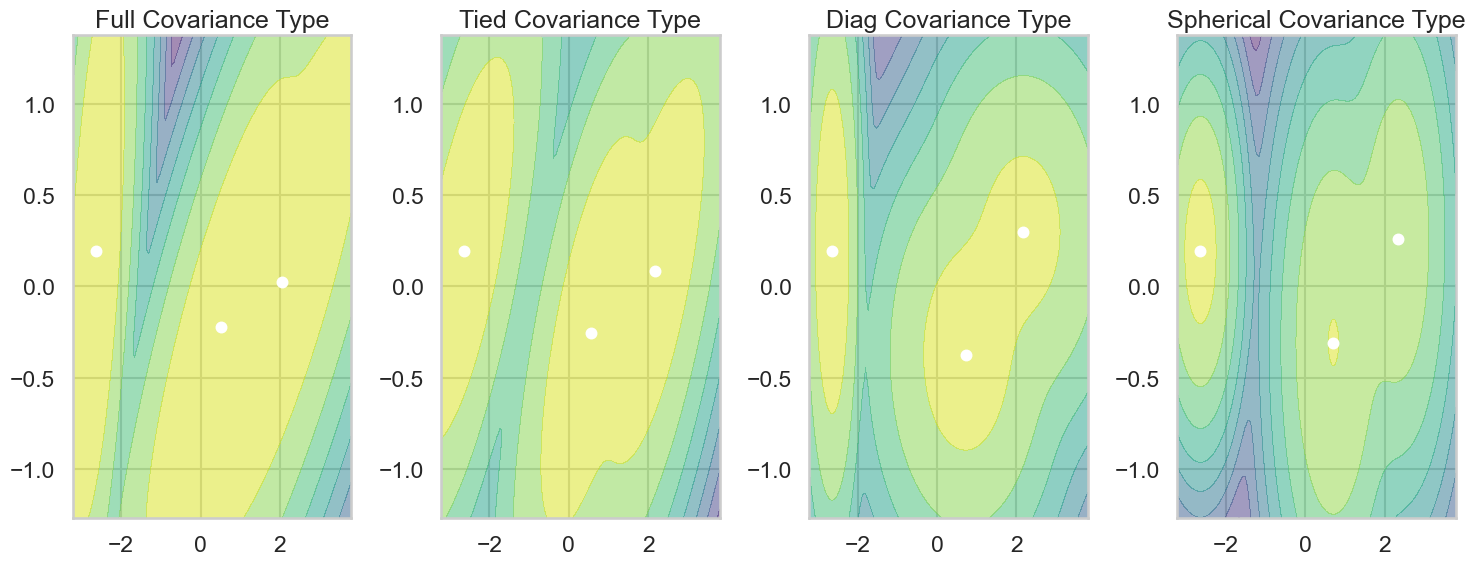

In [33]:

X = iris_data
# Reduce the dimensionality to 2 features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit a GMM with 2 components on the reduced data
gmm = GaussianMixture(n_components=2)
gmm.fit(X_pca)

# Plot the GMM with 2 features
plot_gmm(X_pca, gmm, 'Data and GMM clusters')

## Customer dataset
Repeat all the above on the customer data set 

In [34]:
customer = pd.read_csv("./Customer data.csv",index_col="ID")
customer.reset_index(drop=True, inplace=True)

scaler = MaxAbsScaler()

customer['Income'] = scaler.fit_transform(customer['Income'].values.reshape(-1, 1))
customer['Age'] = scaler.fit_transform(customer['Age'].values.reshape(-1, 1))

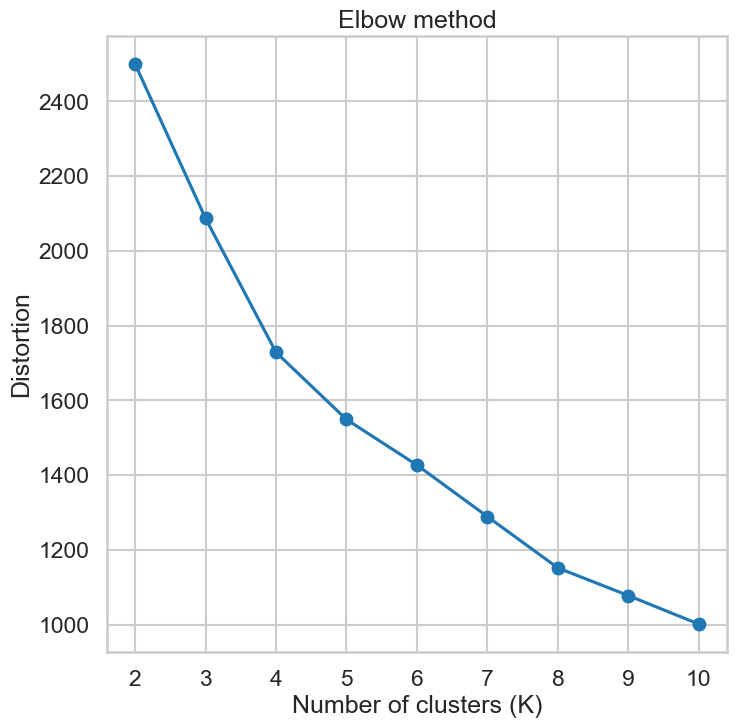

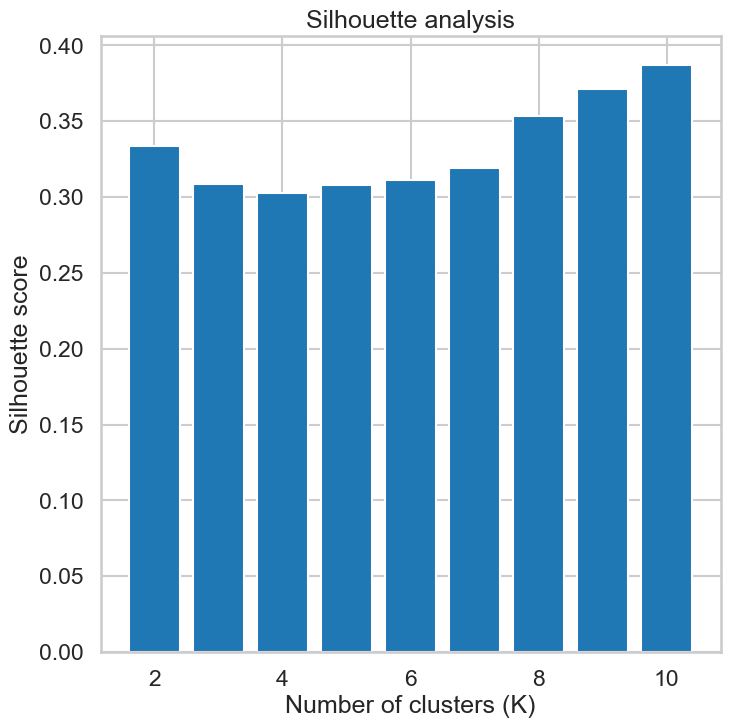

Best K based on silhouette : 10
Silhouette score for the best K: 0.3867266523964087


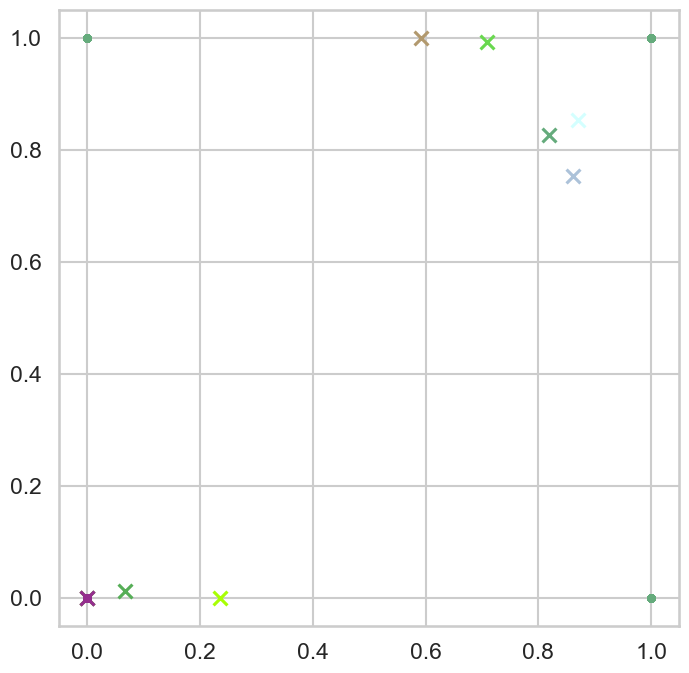

In [35]:
KMeansClustring(customer.to_numpy(copy=True))

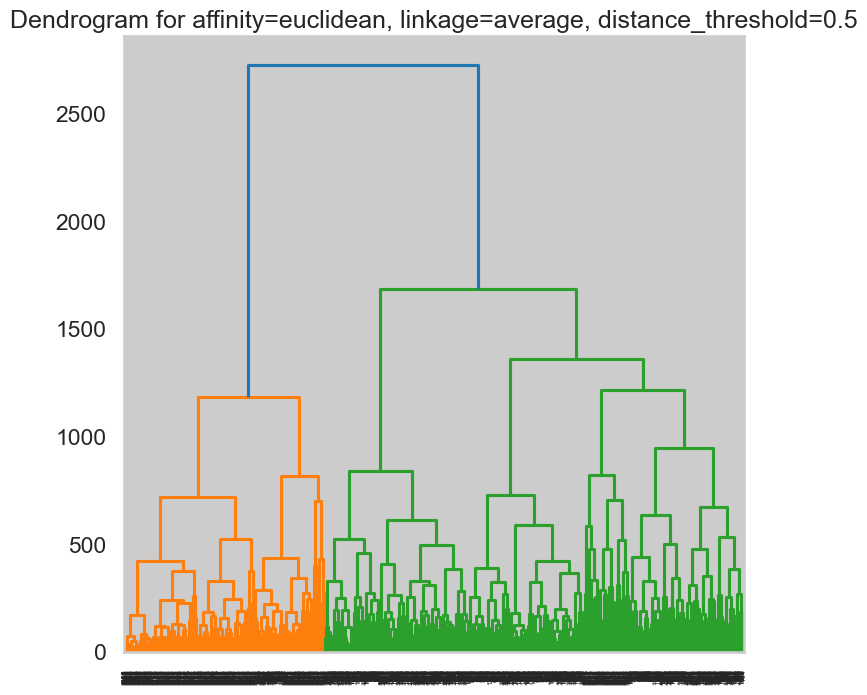

Cluster labels: [25 46 27 ... 14  3 14]
Silhouette score: 0.8691059678167501


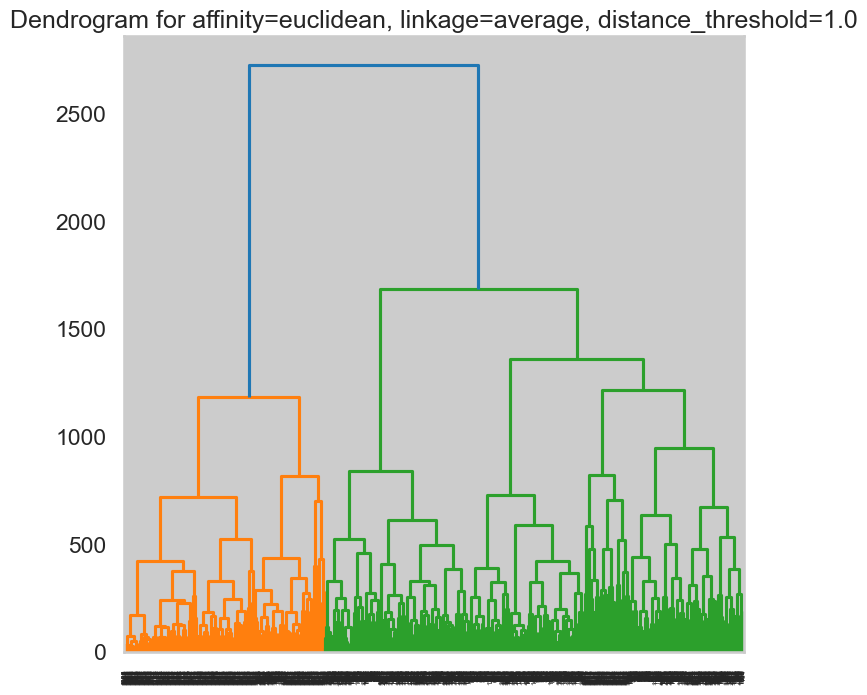

Cluster labels: [25 46 27 ... 14  3 14]
Silhouette score: 0.8691059678167501


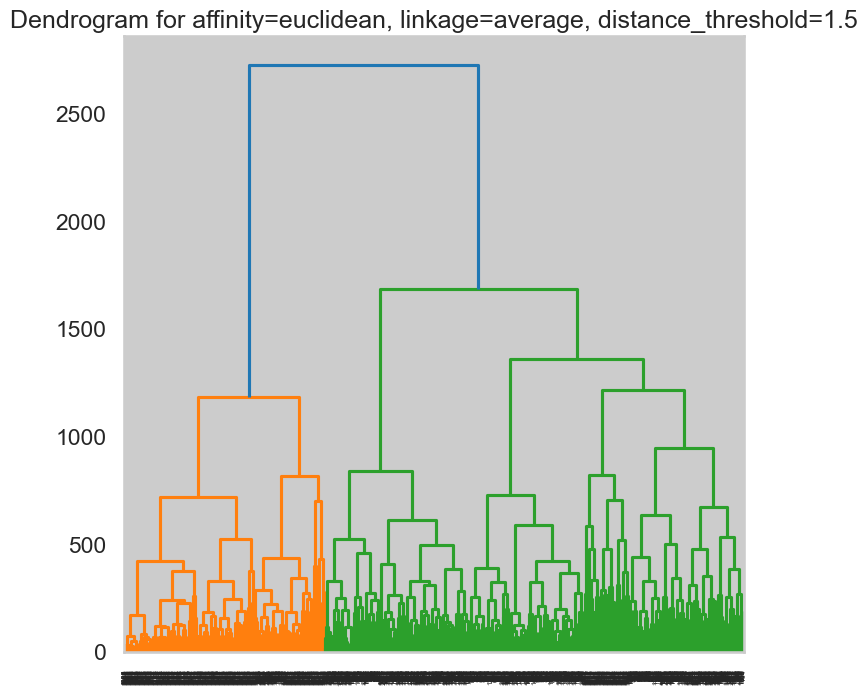

Cluster labels: [ 2  0  1 ... 11  1 11]
Silhouette score: 0.3197129460890208


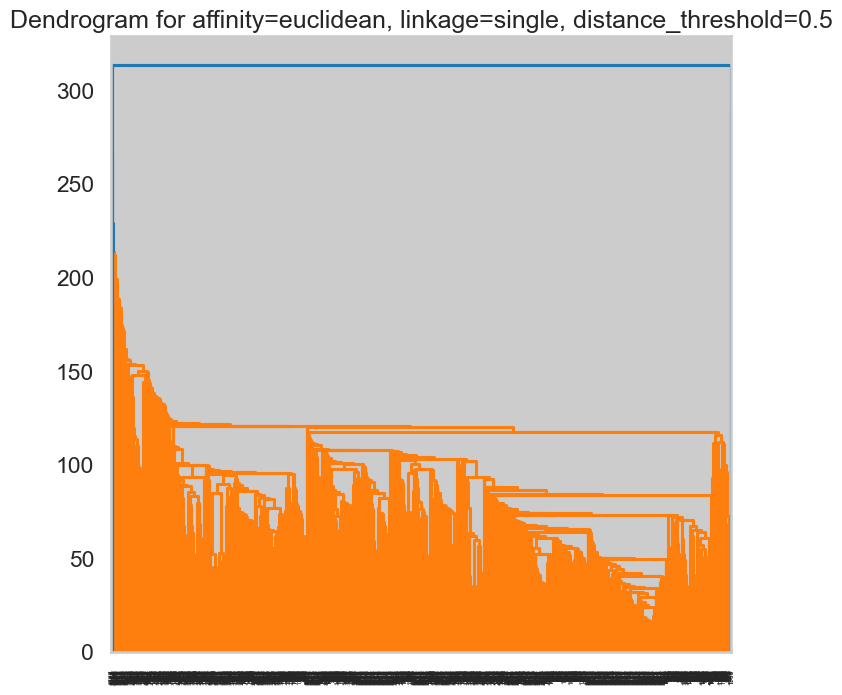

Cluster labels: [21 30 70 ... 14  8 14]
Silhouette score: 0.8691059678167501


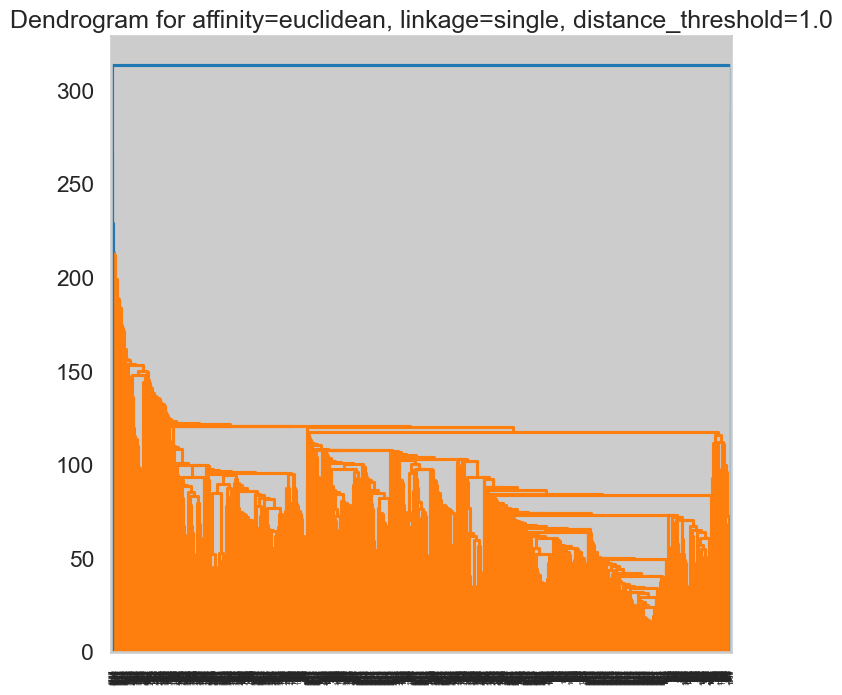

Cluster labels: [21 30 70 ... 14  8 14]
Silhouette score: 0.8691059678167501


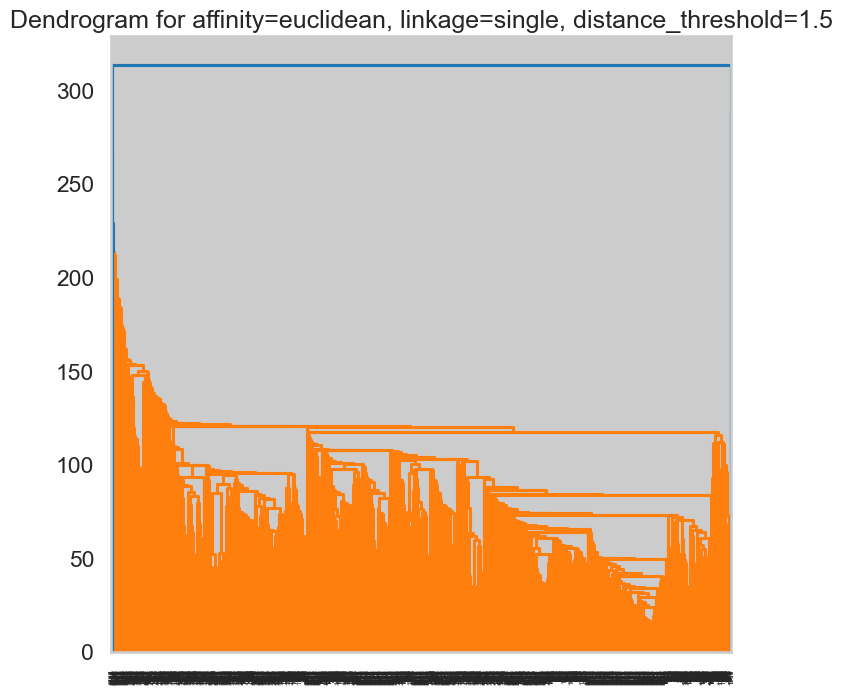

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


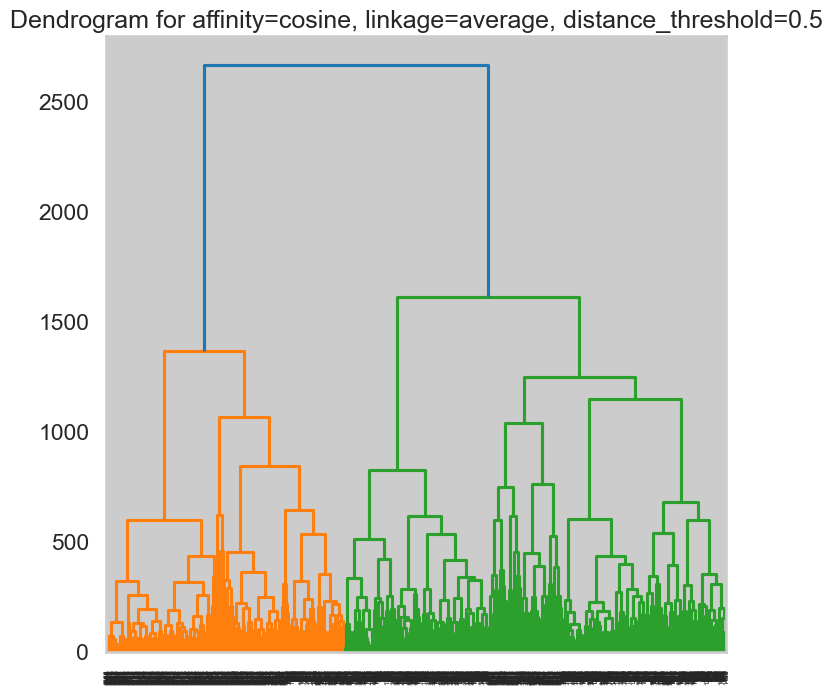

Cluster labels: [0 0 0 ... 3 0 3]
Silhouette score: 0.04634947100755365


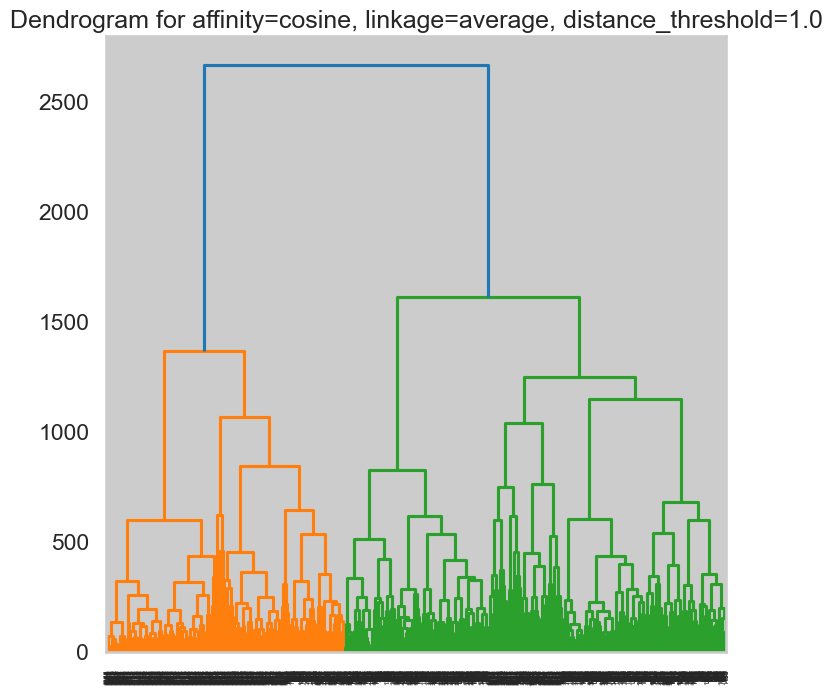

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


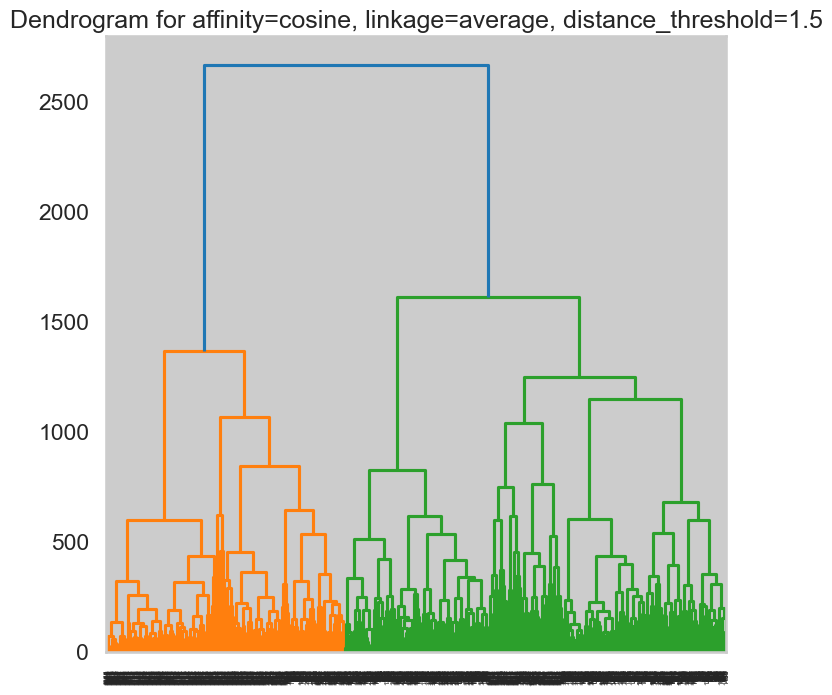

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


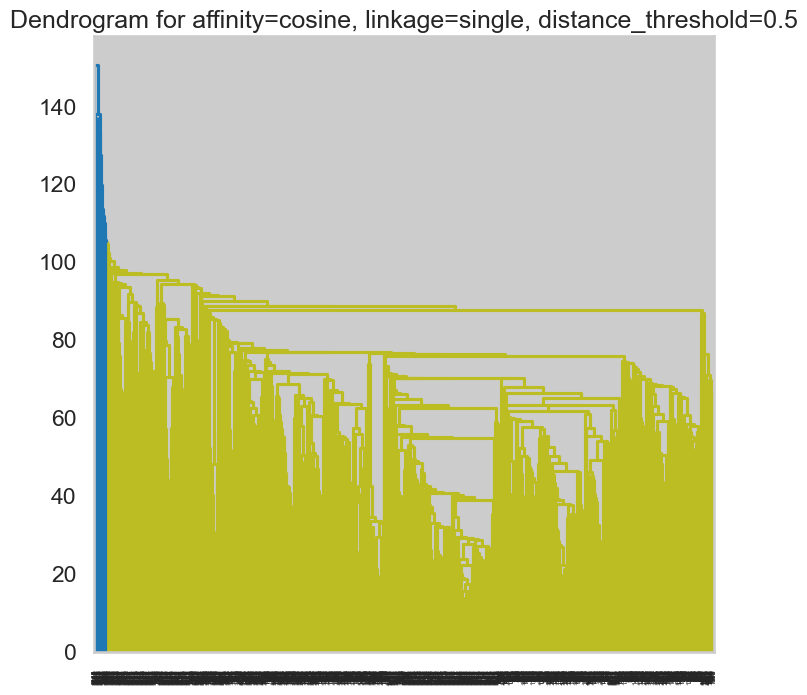

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


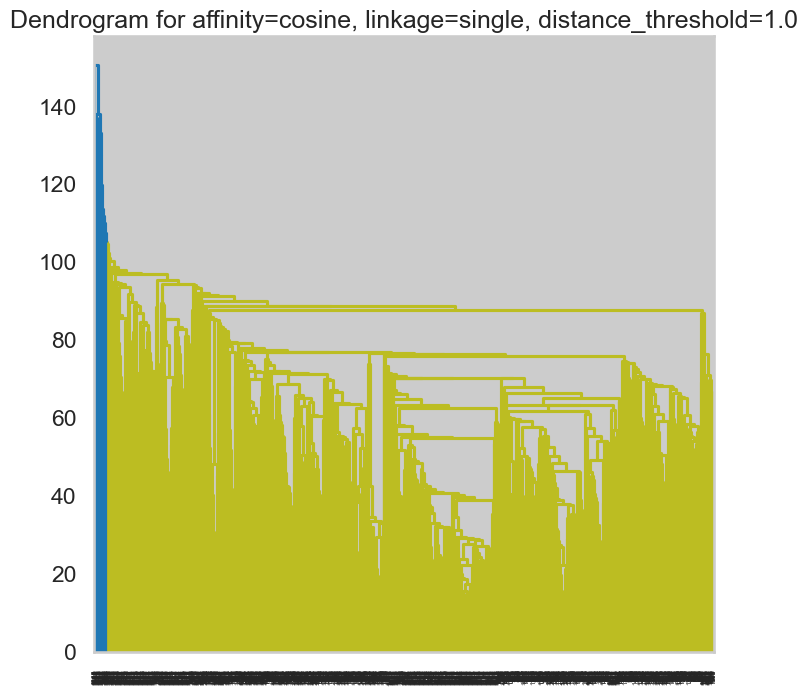

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


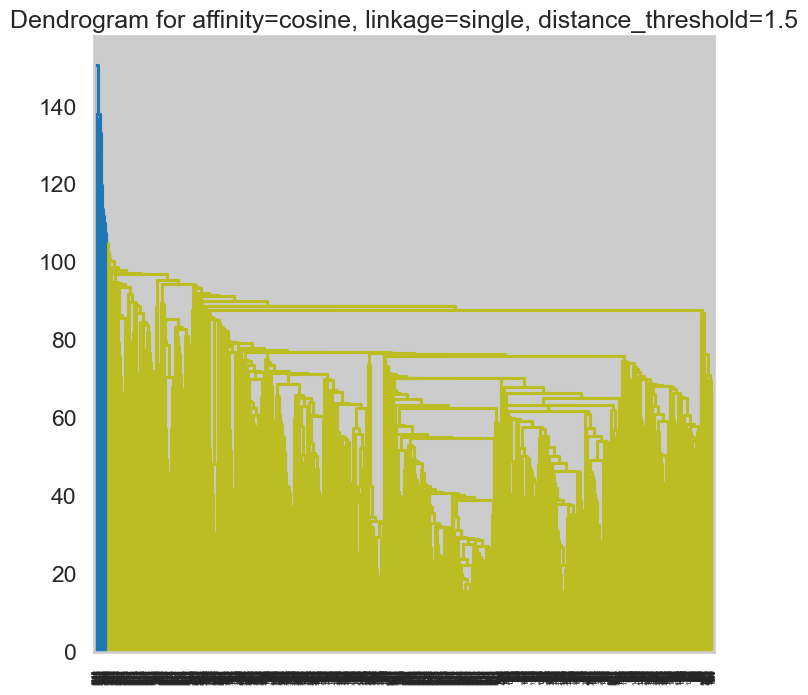

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score cannot be calculated for one label


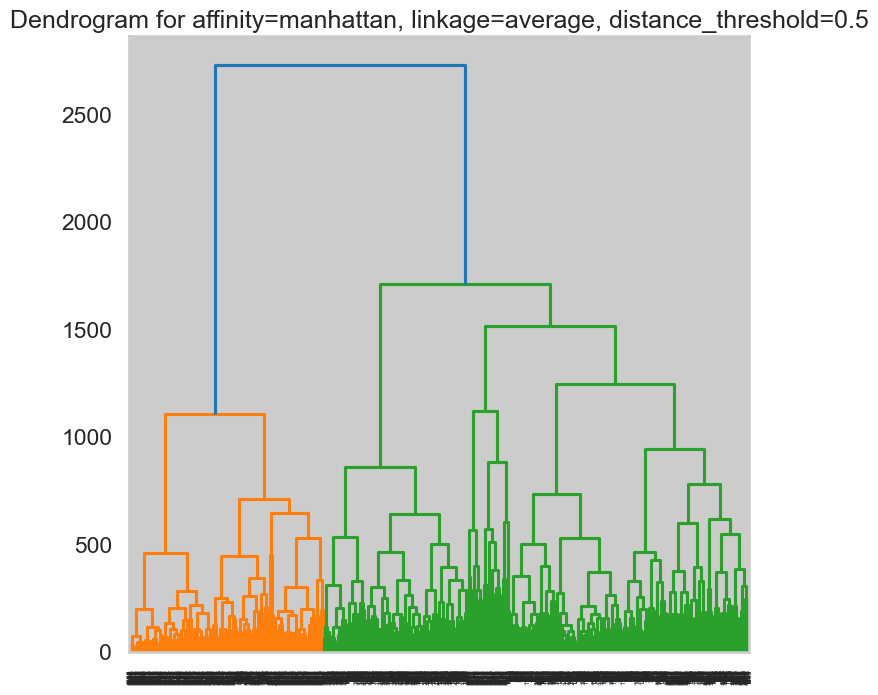

Cluster labels: [18 21 55 ... 62 14 62]
Silhouette score: 0.866222759723346


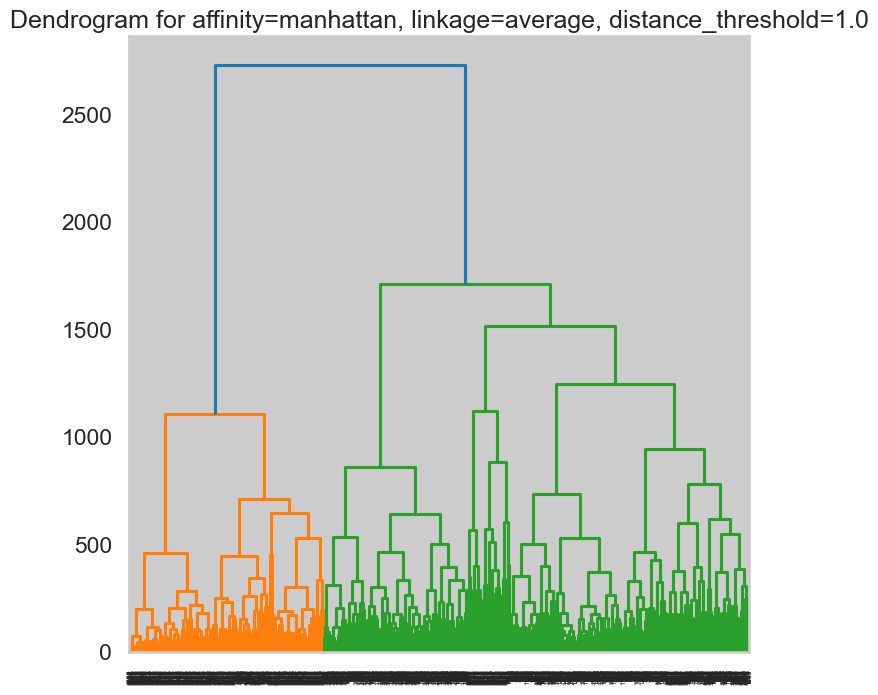

Cluster labels: [18 21 55 ... 62 14 62]
Silhouette score: 0.8691059678167501


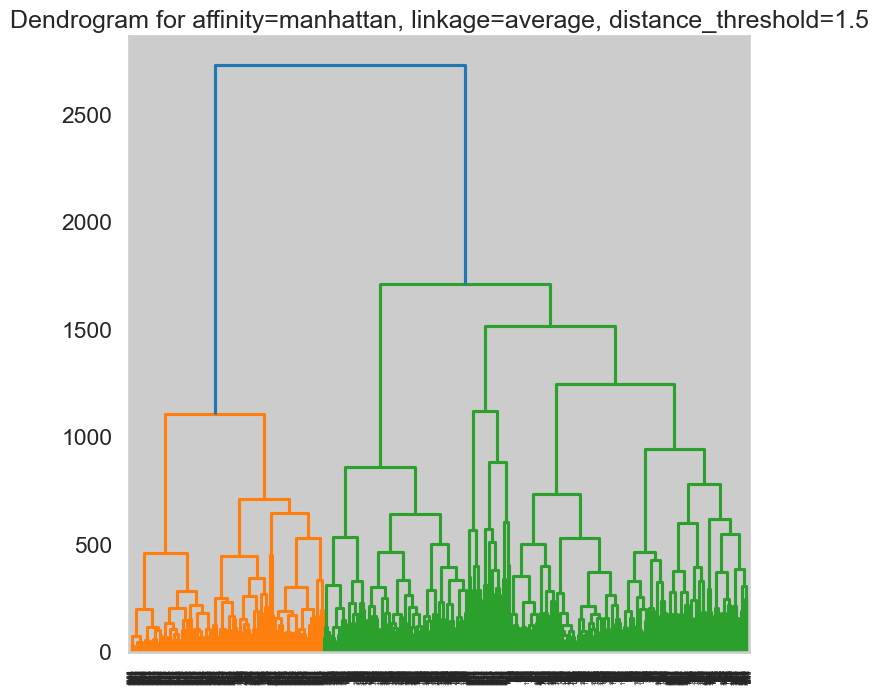

Cluster labels: [32  2 25 ... 14 19 14]
Silhouette score: 0.5108564962052136


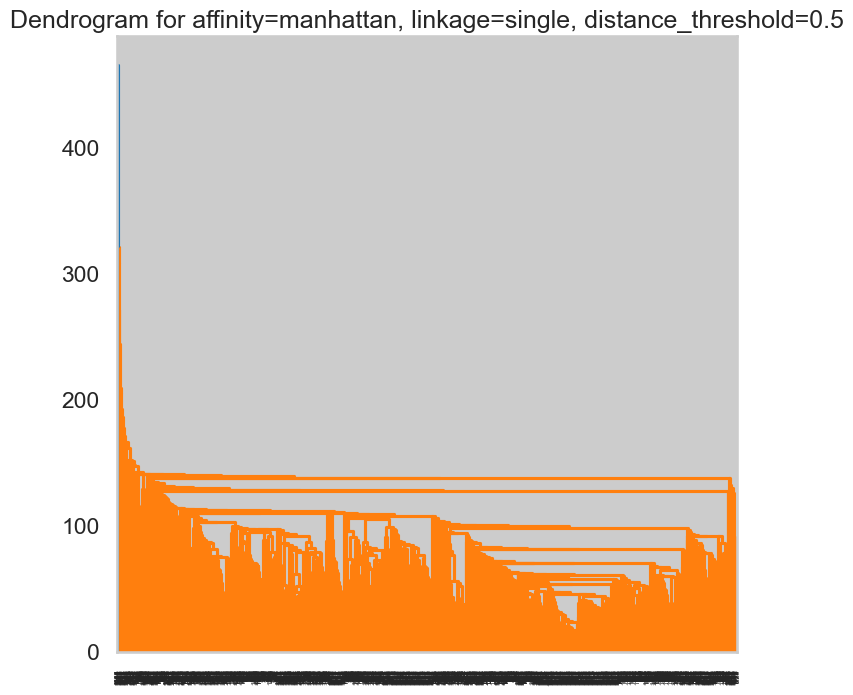

Cluster labels: [44 30 70 ... 14  8 14]
Silhouette score: 0.8691059678167501


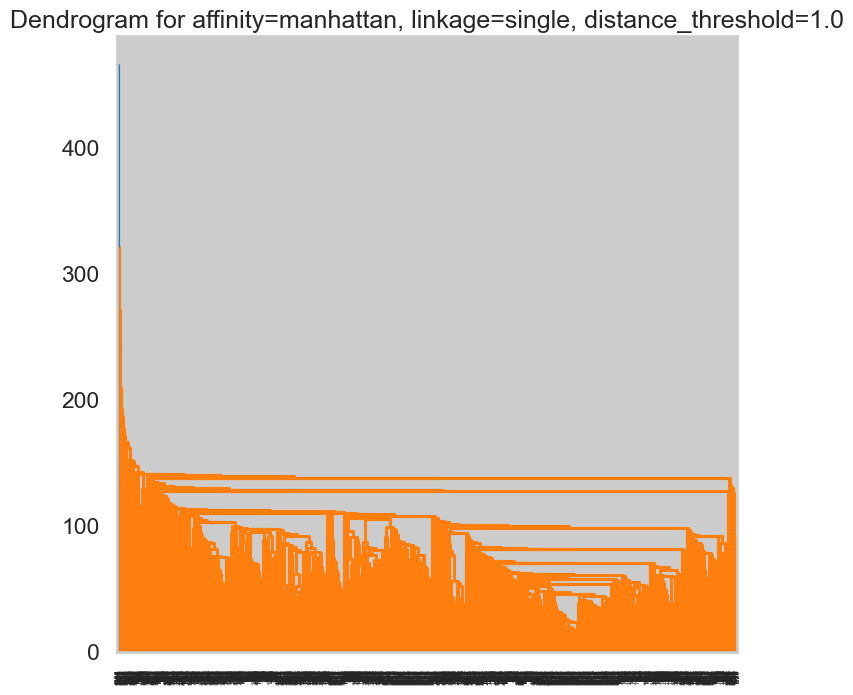

Cluster labels: [44 30 70 ... 14  8 14]
Silhouette score: 0.8691059678167501


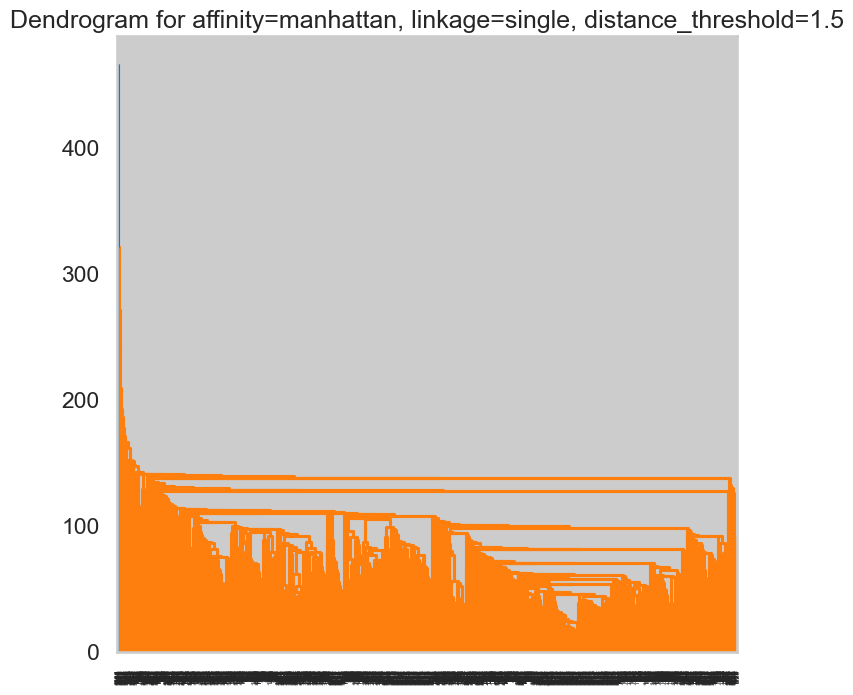

Cluster labels: [0 0 0 ... 0 0 0]
Silhouette score: 0.34230883791961914


In [36]:
HierarchicalClustering(customer)

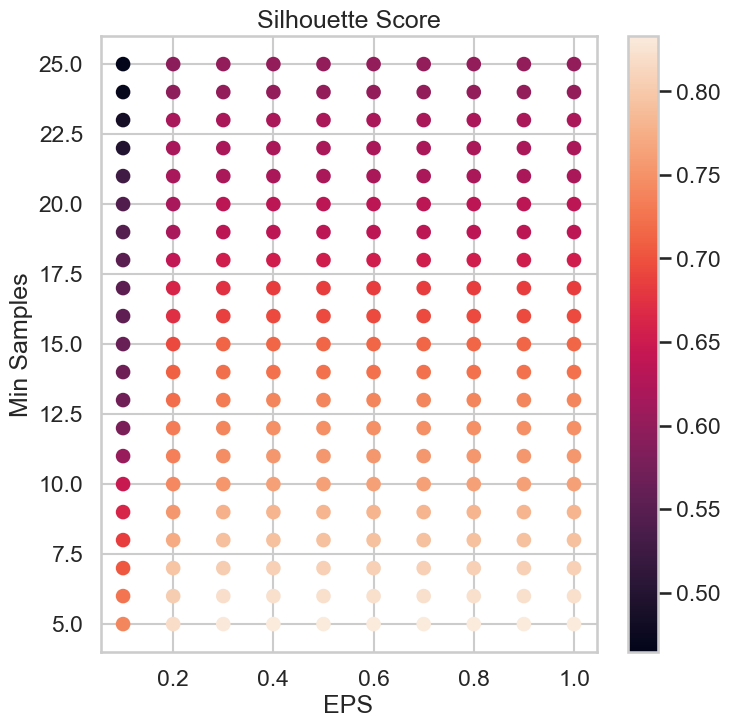

Best Silhouette Score: 0.8330888236776491
Best EPS: 0.4
Best Min Samples: 5


In [37]:
DBScan(customer)

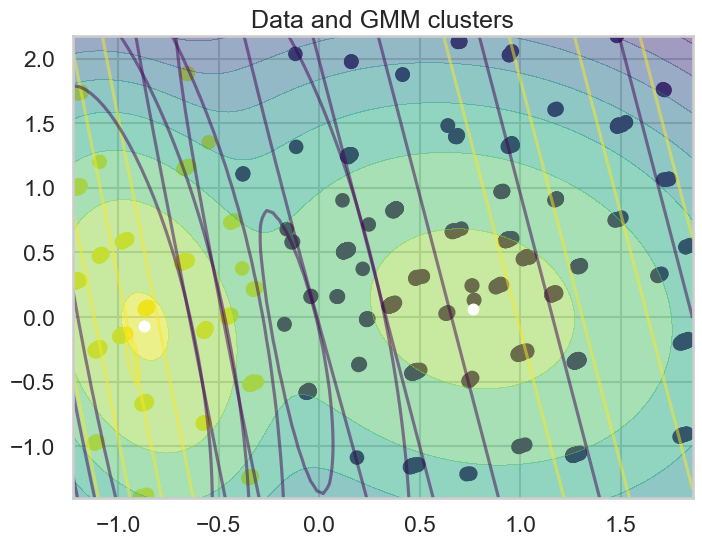

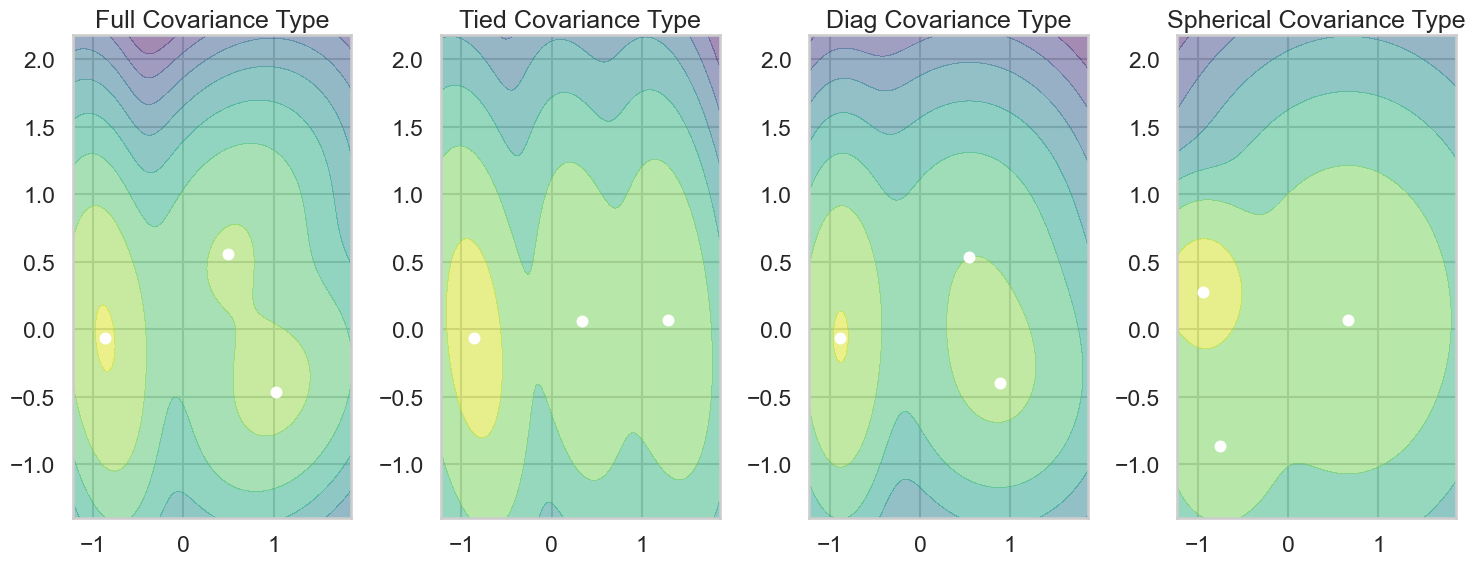

In [38]:
X = customer.to_numpy(copy=True)
# Reduce the dimensionality to 2 features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit a GMM with 2 components on the reduced data
gmm = GaussianMixture(n_components=2)
gmm.fit(X_pca)

# Plot the GMM with 2 features
plot_gmm(X_pca, gmm, 'Data and GMM clusters')